<a href="https://colab.research.google.com/github/AribelGuzman/EDA_Cincinnati/blob/main/EDA_Cincinnati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

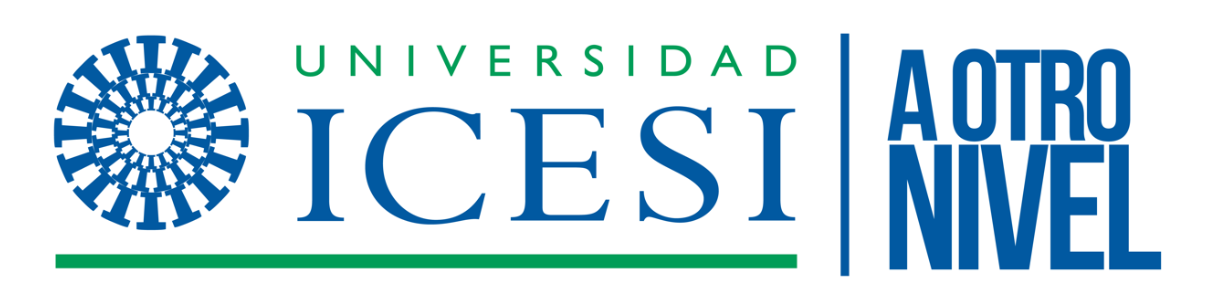

**Presentado Por:**

*   Diana Guzmán Granobles
*   Sebastian Barrera Peña
*   Gustavo Restrepo Figueroa

**Maestría en Ciencia de Datos 2023-1**

# **Cague de Librerías y complementos**

In [ ]:
import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import norm ## distribución normal
from scipy.stats import poisson ## distribución Poisson
from scipy.stats import t ## distribución t
from scipy.stats import f ## distribución F
from scipy.stats import ttest_1samp  ## Prueba t una población
from scipy.stats import ttest_ind ## Prueba t comparación medias
from scipy.stats import shapiro ## Prueba normalidad Shapiro-Wilks
from scipy.stats import anderson ## Prueba normalidad Anderson-Darling
from scipy.stats import levene ## Prueba homogeneidad de varianzas Levene
from scipy.stats import mannwhitneyu ## Prueba Mann-Whitney-Wilcoxon (comparación dos poblaciones)
from scipy.stats import f_oneway ## Prueba ANOVA de una vía
from scipy.stats import chi2_contingency ## Prueba chi cuadrado de Pearson
from scipy.stats import pearsonr ## Coeficiente de correlación de Pearson con prueba
import statsmodels.stats as sm  ## estadísticas
import statsmodels.api as sm1  ## estadísticas
from statsmodels.graphics.gofplots import qqplot ## Gráfico QQ plot
from sklearn.preprocessing import OneHotEncoder

# **Actividad**

El objetivo del proyecto es realizar el análisis exploratorio de un dataset de acuerdo al ejemplo visto en clase. Por crear un notebook  incluyendo:

>**1.**  Análisis general del dataset (size, shape, describe)

>**2.** Análisis de datos nulos

>**3.** Análisis de outliers

>**4.** Análisis univariado estadístico y gráfico (distribución, tendencia)

>**5.** Análisis de relación entre variables, estadístico y gráfico (correlación)

>**6.** Preparación de los datos ( corrección de columnas, manejo de nulos, outliers)

>**7.** Medidas para Data leakage( Opcional)

>**8.** Deseable pero no obligatorio: Custom transformers y Pipelines.

# **1. Análisis general del dataset (size, shape, describe)**

## **Contexto del análisis**

Tomado de: https://data.cincinnati-oh.gov/safety/PDI-Police-Data-Initiative-Crime-Incidents/k59e-2pvf/data

Incidentes delictivos de PDI (Iniciativa de datos policiales):

**Descripción de los datos**: estos datos representan los incidentes delictivos informados en la ciudad de Cincinnati. Los incidentes son los registros, de los delitos denunciados, cotejados por una agencia de gestión. Los incidentes generalmente se alojan en un Sistema de gestión de registros (RMS) que almacena datos de toda la agencia sobre las operaciones de aplicación de la ley. Esto no incluye llamadas de policía para servicio, información de arresto, determinación final del caso o cualquier otro dato de resultado del incidente.

**Creación de datos**: El Departamento de Policía de Cincinnati (CPD) registra los incidentes delictivos en la ciudad a través del Sistema de gestión de registros (RMS) que almacena datos de toda la agencia sobre las operaciones de aplicación de la ley. Datos creados por: La fuente de estos datos es el Departamento de Policía de Cincinnati.

**Frecuencia de actualización**: estos datos se actualizan diariamente.
CincyInsights: la ciudad de Cincinnati mantiene un portal de tablero interactivo, CincyInsights además de nuestros datos abiertos en un esfuerzo por aumentar el acceso y el uso de los datos de la ciudad. Este conjunto de datos tiene un tablero asociado disponible aquí: https://insights.cincinnati-oh.gov/stories/s/8eaa-xrvz

**Diccionario de datos**: un diccionario de datos que proporciona definiciones de columnas y atributos está disponible como archivo adjunto a este conjunto de datos.

**Procesamiento**: la ciudad de Cincinnati se compromete a proporcionar los datos más granulares y precisos posibles. En esa búsqueda, la Oficina de rendimiento y análisis de datos facilita el procesamiento estándar de la mayoría de los datos sin procesar antes de su publicación. El procesamiento incluye, entre otros: verificación de direcciones, geocodificación, decodificación de atributos y adición de áreas administrativas (es decir, censo, vecindarios, distritos policiales, etc.).

**Descargo de responsabilidad**: De conformidad con las leyes de privacidad, todos los conjuntos de datos de seguridad pública se anonimizan y se redactan adecuadamente antes de su publicación en el portal de datos abiertos de la ciudad de Cincinnati. Esto significa que para todos los conjuntos de datos de seguridad pública: (1) los dos últimos dígitos de todas las direcciones se han reemplazado con "XX" y, en los casos en que hay una dirección de calle de un solo dígito, el número de dirección completo se reemplaza con "X"; y (2) La latitud y la longitud se han sesgado aleatoriamente para representar valores dentro de la misma área de bloque (pero no la ubicación exacta) del incidente.


## **Pregunta SMART**

¿Cómo se comporta y ha evolucionado el número de incidentes criminales reportados en Cincinnati, Ohio durante los últimos años? y qué datos relevantes tenemos al respecto, tales cómo:

>* Tipos de crímenes más comunes en el área
>* Generos de las victimas y sospechosos
>* Otros datos relevantes

## **Descripción de los datos:**

De acuerdo con el diccionario de datos que proporciona la misma policía de Cincinnati, el siguiente es un listado de las variables de la base de de datos:

**INSTANCEID**: ID del incidente

**INCIDENT_NO**: El identificador único para este conjunto de datos. Cada id representa a una víctima de un crimen.

**DATE_REPORTED**: la fecha en que se informó el delito al Departamento de Policía de Cincinnati.

**DATE_FROM**: La fecha/hora estimada del inicio del crimen.

**DATE_TO**: La fecha/hora estimada del final del crimen.

**CLSD**: El resultado de la respuesta al incidente.

**UCR**: Código Nacional Uniforme de Reporte de Delitos

**DST**: DST = Distrito CPD. La ciudad de Cincinnati está dividida en seis distritos policiales, cada uno de los cuales está comandado por un capitán responsable de las operaciones y el despliegue de personal.

**BEAT**: Un límite de un área más pequeña definida dentro del distrito.

**OFFENSE**: La descripción del crimen que tuvo lugar.

**LOCATION**: La categoría del área donde ocurrió el crimen (es decir, escuela, centro de diversión, bar, hora, etc.)

**THEFT_CODE**: Si el delito fue un robo, este campo es un descriptor del tipo de robo que tuvo lugar. Ejemplos de este campo son: robo de bolsos, robo de bolsillo, hurto en tiendas, etc.

**FLOOR**: Si el crimen tuvo lugar en un edificio de varios pisos, este campo indica en qué piso del edificio ocurrió el incidente.

**SIDE**: ubicación de ocurrencia del crimen: al frente, lateral... etc.

**OPENING**: Lugar de la vivienda donde ocurrió el crimen: puerta, venta, garaje, etc.

**HATE_BIAS**: Para cada delito, si se considera un delito de odio, este campo indicará a qué grupo estaba dirigido el delito de odio. Este campo no incluye solo clases protegidas. Hay un indicador de violencia relacionada con pandillas.

**DAYOFWEEK**: El nombre del día de la semana en que se estimó que se cometió el delito.

**CPD_NEIGHBORHOOD**: El vecindario enumerado del incidente usando los límites definidos por el Departamento de Policía de Cincinnati. Este atributo puede diferir del vecindario SNA y el vecindario del consejo comunitario según la ubicación del incidente.

**SNA_NEIGHBORHOOD**: El vecindario enumerado del incidente utilizando las Aproximaciones estadísticas de vecindario (SNA). Esta clasificación de vecindario es el área de informes subyacente para todos los datos de la ciudad.

**WEAPONS**: Si se usaron armas en el crimen, este campo es una descripción de qué armas se usaron en el crimen.

**DATE_OF_CLEARANCE**: La fecha en que tuvo lugar la acción de "Clds". Por ejemplo: si Clsd = "Orden emitida", entonces la Fecha de liquidación es la fecha en que se emitió la orden.

**HOUR_FROM**: Este campo representa la hora y el minuto estimados en que ocurrió el crimen. Si el campo es de solo dos dígitos (es decir, 15), el crimen tuvo lugar a las 12:15 am. Si este campo tiene cuatro dígitos, los dos primeros son la hora y los dos segundos son los minutos. Estos tiempos están en formato de 24 horas.

**HOUR_TO**: este campo representa la hora y el minuto estimados en que finalizó un delito. Si el campo es de solo dos dígitos (es decir, 15), el crimen tuvo lugar a las 12:15 am. Si este campo tiene cuatro dígitos, los dos primeros son la hora y los dos segundos son los minutos. Estos tiempos están en formato de 24 horas.

**ADDRESS_X**: La ubicación donde ocurrió el incidente.

**DISCLAIMER**: De conformidad con las leyes de privacidad, todos los conjuntos de datos de seguridad pública se anonimizan y se redactan adecuadamente antes de su publicación en el portal de datos abiertos de la ciudad de Cincinnati. Esto significa que para todos los conjuntos de datos de seguridad pública:
(1) los dos últimos dígitos de todas las direcciones han sido reemplazados por "XX", y en los casos en que hay una dirección de calle de un solo dígito, el número de dirección completo se reemplaza por "X"; y (2) La latitud y la longitud se han sesgado aleatoriamente para representar valores dentro de la misma área de bloque (pero no la ubicación exacta) del incidente.

**LONGITUDE_X**: Las coordenadas de longitud del incidente. Este atributo se sesgó aleatoriamente para representar valores dentro de la misma área de bloque (pero no la ubicación exacta) de los incidentes. Esto se hace de conformidad con las leyes de privacidad para
proteger a los destinatarios de las respuestas de CPD.

**LATITUDE_X**: Las coordenadas de latitud del incidente. Este atributo se sesgó aleatoriamente para representar valores dentro de la misma área de bloque (pero no la ubicación exacta) de los incidentes. Esto se hace de conformidad con las leyes de privacidad para
proteger a los destinatarios de las respuestas de CPD.

**VICTIM_AGE**: El rango de edad de la víctima en el crimen.

**VICTIM_RACE**: La raza de la víctima en el crimen.

**VICTIM_ETHNICITY**: El origen étnico de la víctima en el crimen.

**VICTIM_GENDER**: El género de la víctima en el crimen.

**SUSPECT_AGE**: El rango de edad del sospechoso en el crimen.

**SUSPECT_RACE**: La raza del sospechoso en el crimen.

**SUSPECT_ETHNICITY**: El origen étnico del sospechoso del delito.

**SUSPECT_GENDER**: El género del sospechoso en el crimen.

**TOTALNUMBERVICTIMS**: La cantidad de personas afectadas por el delito.

**TOTALSUSPECTS**: La cantidad de los que fueron sospechosos de haber cometido el delito.

**UCR_GROUP**: Código de grupo nacional uniforme de denuncia de delitos

**COMMUNITY_COUNCIL_NEIGHBORHOOD**: El vecindario enumerado del incidente usando los límites definidos por el consejo comunitario. Este atributo puede diferir del vecindario SNA según la ubicación del incidente.

**ZIP**: El código postal de la ubicación del crimen.

## **Cargar los datos**

In [ ]:
#Importamos el dataset
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
URL = "/content/gdrive/MyDrive/00. Maestría Ciencia de Datos/00. Sets_De_Datos_Maestria/PDI__Police_Data_Initiative__Crime_Incidents.csv" #GARF
#URL = "/content/drive/MyDrive/MCD/Semestre I/02. Analisis_Exploratorio_de_Datos/PDI__Police_Data_Initiative__Crime_Incidents.csv" #SBP
#URL= "/content/gdrive/MyDrive/0.MaestriaDSIcesi/EDA/Tarea_2/PDI__Police_Data_Initiative__Crime_Incidents.csv" #DAGG

df=pd.read_csv(URL)

<ipython-input-111-0070084338ab>:5: DtypeWarning: Columns (7,8,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(URL)


# **Análisis Inicial**:

El análisis inicial del Dataset incluye: 
1. La revisión de las primeras filas (head) y de las últimas filas (tail) para reconocer visualmente los datos. 
2. La descripción de la forma (shape) que nos comunica el número total de filas y columnas de la base de datos. 
3. El nombre de las variables/columnas (columns) de la base de datos. 
4. La estadística general de las variables numéricas (describe), que incluye para cada variable, un conteo de los datos, su media, su desviación estándar, el valor mínimo, los quantiles del 25%, el 50% y el 75% y finalmente, el valor máximo.
5. La estadística general de las variables discretas (describe incluyendo los datos tipo "object"), que incluye para cada variable, un conteo, los valores únicos de la variable, la moda (el dato que más se repiete) y la frecuencia de esa moda (cuantas veces se repite).   
6. Finalmente, la revisión de los valores únicos de cada variable que nos permite entender cuántos valores únicos existen por cada variable y si es posible agruparlos por categorías.

In [ ]:
df.head(3)

,INSTANCEID,INCIDENT_NO,DATE_REPORTED,DATE_FROM,DATE_TO,CLSD,UCR,DST,BEAT,OFFENSE,...,SUSPECT_AGE,SUSPECT_RACE,SUSPECT_ETHNICITY,SUSPECT_GENDER,TOTALNUMBERVICTIMS,TOTALSUSPECTS,UCR_GROUP,ZIP,COMMUNITY_COUNCIL_NEIGHBORHOOD,SNA_NEIGHBORHOOD
0,7F2AF370-2EF7-4D73-A481-4EC99A9B862E,239006626,03/12/2023 04:27:38 AM,03/12/2023 02:29:38 AM,03/12/2023 02:29:38 AM,NaN,600.0,3,4,THEFT,...,UNKNOWN,NaN,NaN,NaN,1.0,NaN,THEFT,45214.0,SOUTH FAIRMOUNT,SOUTH FAIRMOUNT
1,194811D9-4462-4805-BB06-D26A04050CA3,239006628,03/12/2023 04:23:00 AM,03/12/2023 01:20:00 AM,03/12/2023 01:30:00 AM,Z--EARLY CLOSED,810.0,CENTRAL BUSINESS,2,ASSAULT,...,UNKNOWN,NaN,NaN,NaN,1.0,NaN,PART 2 MINOR,45202.0,DOWNTOWN,DOWNTOWN
2,760A6CD4-E02D-43F3-A425-DA06F90A173B,239006624,03/12/2023 03:30:00 AM,03/12/2023 03:15:00 AM,03/12/2023 03:25:00 AM,F--CLEARED BY ARREST - ADULT,1493.0,3,2,CRIMINAL DAMAGING/ENDANGERING,...,UNKNOWN,NaN,NaN,NaN,1.0,NaN,PART 2 MINOR,45205.0,WEST PRICE HILL,WEST PRICE HILL


In [ ]:
df.tail(3)

,INSTANCEID,INCIDENT_NO,DATE_REPORTED,DATE_FROM,DATE_TO,CLSD,UCR,DST,BEAT,OFFENSE,...,SUSPECT_AGE,SUSPECT_RACE,SUSPECT_ETHNICITY,SUSPECT_GENDER,TOTALNUMBERVICTIMS,TOTALSUSPECTS,UCR_GROUP,ZIP,COMMUNITY_COUNCIL_NEIGHBORHOOD,SNA_NEIGHBORHOOD
491983,380E657C-8BF7-47E7-8108-30278767270D,229022570,NaN,NaN,NaN,NaN,810.0,NaN,NaN,ASSAULT,...,UNKNOWN,NaN,NaN,NaN,1.0,NaN,PART 2 MINOR,NaN,NaN,NaN
491984,F870B4AB-4EEA-456D-8E71-019E57D2B503,219015276,NaN,NaN,NaN,NaN,600.0,NaN,NaN,THEFT,...,UNKNOWN,NaN,NaN,NaN,NaN,1.0,THEFT,NaN,NaN,NaN
491985,3E6EECF0-5823-41AF-937F-AE366CB3EAC4,159024031,NaN,NaN,NaN,F--CLEARED BY ARREST - ADULT,432.0,2.0,2.0,NEGLIGENT ASSAULT,...,UNKNOWN,NaN,NaN,NaN,1.0,NaN,AGGRAVATED ASSAULTS,45208.0,HYDE PARK,HYDE PARK


In [ ]:
#Forma y tamaño del dataset
df.shape

(491986, 40)

In [ ]:
# Nombre de variables
df.columns

Index(['INSTANCEID', 'INCIDENT_NO', 'DATE_REPORTED', 'DATE_FROM', 'DATE_TO',
       'CLSD', 'UCR', 'DST', 'BEAT', 'OFFENSE', 'LOCATION', 'THEFT_CODE',
       'FLOOR', 'SIDE', 'OPENING', 'HATE_BIAS', 'DAYOFWEEK', 'RPT_AREA',
       'CPD_NEIGHBORHOOD', 'WEAPONS', 'DATE_OF_CLEARANCE', 'HOUR_FROM',
       'HOUR_TO', 'ADDRESS_X', 'LONGITUDE_X', 'LATITUDE_X', 'VICTIM_AGE',
       'VICTIM_RACE', 'VICTIM_ETHNICITY', 'VICTIM_GENDER', 'SUSPECT_AGE',
       'SUSPECT_RACE', 'SUSPECT_ETHNICITY', 'SUSPECT_GENDER',
       'TOTALNUMBERVICTIMS', 'TOTALSUSPECTS', 'UCR_GROUP', 'ZIP',
       'COMMUNITY_COUNCIL_NEIGHBORHOOD', 'SNA_NEIGHBORHOOD'],
      dtype='object')

In [ ]:
#para las variables númericas revisamos sus principales estadísticas descriptivas 
df.describe()

,UCR,HOUR_FROM,HOUR_TO,LONGITUDE_X,LATITUDE_X,TOTALNUMBERVICTIMS,TOTALSUSPECTS,ZIP
count,491845.000000,491977.000000,490596.000000,426964.000000,426964.000000,491625.000000,235273.000000,4.919750e+05
mean,818.516779,811.414735,920.087116,-84.523229,39.140351,1.409448,1.620577,1.198668e+05
std,476.430293,811.784877,804.700009,0.056909,0.030143,2.672751,1.155061,1.824945e+07
min,0.000000,0.000000,0.000000,-84.820015,39.053527,1.000000,1.000000,3.300000e+01
25%,600.000000,130.000000,140.000000,-84.566848,39.116058,1.000000,1.000000,4.520600e+04
50%,600.000000,230.000000,811.000000,-84.520535,39.135675,1.000000,1.000000,4.521600e+04
75%,862.000000,1618.000000,1650.000000,-84.489210,39.156997,1.000000,2.000000,4.522700e+04
max,2761.000000,2359.000000,2359.000000,-84.254382,39.360126,126.000000,24.000000,4.522445e+09


In [ ]:
#Análisis descriptivo de variables categóricas para ver cuáles son valores cualitativos más recurrentes:
df.describe(include = 'object').T

,count,unique,top,freq
INSTANCEID,491986,381504,981EBB76-D90D-4156-B940-F1C8F8668057,126
INCIDENT_NO,491985,381073,199001121,126
DATE_REPORTED,491502,356682,01/15/2019 09:23:00 AM,126
DATE_FROM,491969,270293,01/14/2019 09:00:00 PM,129
DATE_TO,490565,311487,01/14/2019 09:00:00 PM,127
CLSD,490551,13,Z--EARLY CLOSED,148173
DST,491426,12,3,152466
BEAT,490473.0,14.0,3.0,111842.0
OFFENSE,491863,203,THEFT,165566
LOCATION,491969,76,47-STREET,114830


In [ ]:
#Revisando número de valores únicos por variable
df.nunique()

INSTANCEID                        381504
INCIDENT_NO                       381073
DATE_REPORTED                     356682
DATE_FROM                         270293
DATE_TO                           311487
CLSD                                  13
UCR                                  115
DST                                   12
BEAT                                  14
OFFENSE                              203
LOCATION                              76
THEFT_CODE                            10
FLOOR                                 10
SIDE                                  14
OPENING                               14
HATE_BIAS                             27
DAYOFWEEK                              7
RPT_AREA                            1242
CPD_NEIGHBORHOOD                      53
WEAPONS                               69
DATE_OF_CLEARANCE                   4898
HOUR_FROM                           1310
HOUR_TO                             1310
ADDRESS_X                          13020
LONGITUDE_X     

# **2. Análisis de datos nulos**

In [ ]:
# Revisamos el porcentaje de datos nulos en cada una de las variables
df.isnull().sum()/len(df)*100

INSTANCEID                         0.000000
INCIDENT_NO                        0.000203
DATE_REPORTED                      0.098377
DATE_FROM                          0.003455
DATE_TO                            0.288829
CLSD                               0.291675
UCR                                0.028659
DST                                0.113824
BEAT                               0.307529
OFFENSE                            0.025001
LOCATION                           0.003455
THEFT_CODE                        66.310017
FLOOR                             88.226291
SIDE                              88.948263
OPENING                           90.317204
HATE_BIAS                          0.007114
DAYOFWEEK                          1.395568
RPT_AREA                           0.644124
CPD_NEIGHBORHOOD                   0.741078
WEAPONS                            0.009553
DATE_OF_CLEARANCE                  1.766717
HOUR_FROM                          0.001829
HOUR_TO                         

In [ ]:
#Verificamos el tipo de datos de cada una de las variables del data Set, este data set contiene en su gran mayoría variables categóricas:
df.dtypes

INSTANCEID                         object
INCIDENT_NO                        object
DATE_REPORTED                      object
DATE_FROM                          object
DATE_TO                            object
CLSD                               object
UCR                               float64
DST                                object
BEAT                               object
OFFENSE                            object
LOCATION                           object
THEFT_CODE                         object
FLOOR                              object
SIDE                               object
OPENING                            object
HATE_BIAS                          object
DAYOFWEEK                          object
RPT_AREA                           object
CPD_NEIGHBORHOOD                   object
WEAPONS                            object
DATE_OF_CLEARANCE                  object
HOUR_FROM                         float64
HOUR_TO                           float64
ADDRESS_X                         

## **Tratamiento de datos Nulos y corrección de formato de datos:**

**FECHAS Y HORAS:**

Para el análisis de datos nulos de las variables tipo fecha y hora, decidimos primero corregir los formatos de las mismas, dado que los datos tipo fecha no se dejan trabajar correctamente sin este paso previo. A continuación, pasamos las variables **DATE_REPORTED**, **DATE_FROM**, **DATE_TO** y **DATE_OF_CLEARANCE** a formato fecha.

In [ ]:
#Cambio fechas al formato adecuado
df["DATE_REPORTED"]=pd.to_datetime(df["DATE_REPORTED"],errors = 'coerce')

In [ ]:
#Cambio la 2da fecha al formato adecuado
df["DATE_FROM"]=pd.to_datetime(df["DATE_FROM"],errors = 'coerce')

In [ ]:
#Cambio la 3ra fecha al formato adecuado
df["DATE_TO"]=pd.to_datetime(df["DATE_TO"],errors = 'coerce')

In [ ]:
#Cambio la 4ta fecha al formato adecuado
df["DATE_OF_CLEARANCE"]=pd.to_datetime(df["DATE_OF_CLEARANCE"],errors = 'coerce')

La columna **HOUR_FROM** tiene un formato de 24 horas que Python no reconoce, e incluso clasifica como FLOAT, pero no nos permite pasar a INT.  Por tando, lo trabajamos como STR y eliminamos el decimal. A continuación, siguiendo las instrucciones del diccionario de datos de la Policía de Cincinnati, corregimos el número de digitos de algunas horas, llenando los espacios con cero a la izquierda, para tener cifras de 4 dígitos que se puedan convertir a horas. Por ejemplo: 25 corresponde a 00:25, 345 corresponde a 03:45, etc. Finalmente, convertimos estos Strings a formato hora.

In [ ]:
# Revisamos cuales son los valores únicos de esta variable
df["HOUR_FROM"].unique()

array([229., 120., 315., ..., 731., 559.,  nan])

In [ ]:
#Cambio de formato de la columna HOUR_FROM:

df["HOUR_FROM"]=df["HOUR_FROM"].astype('str') #Volvemos está columna un tipo string
df["HOUR_FROM"].replace("nan", np.nan, inplace = True) # Pasamos los nan string a nan de Numpy
df["HOUR_FROM"]=df["HOUR_FROM"].str.rstrip(".0") #Eliminamos el ".0" para aplicar el zfill y rellenar los ceros hacia la izquierda para que quede en la forma "0000"
df["HOUR_FROM"]=df["HOUR_FROM"].str.zfill(4) #Rellenamos el string con ceros hasta dejar 4 carácteres 
df["HOUR_FROM"] = pd.to_datetime(df["HOUR_FROM"], format="%H%M", errors = 'coerce' ).dt.time #Convertimos el string a formato hora

In [ ]:
# Verificamos que se hayan aplicado los cambios
df["HOUR_FROM"].unique()

array([datetime.time(2, 29), datetime.time(0, 12), datetime.time(3, 15),
       ..., datetime.time(6, 17), datetime.time(7, 31),
       datetime.time(5, 59)], dtype=object)

In [ ]:
# Revisamos cuales son los valores únicos de esta variable
df["HOUR_TO"].unique()

array([229., 130., 325., ..., 641., 654.,  79.])

In [ ]:
#Cambio de formato de la columna HOUR_FROM:

df["HOUR_TO"]=df["HOUR_TO"].astype('str') #Volvemos está columna un tipo string
df["HOUR_TO"].replace("nan", np.nan, inplace = True) # Pasamos los nan string a nan de Numpy
df["HOUR_TO"]=df["HOUR_TO"].str.rstrip(".0") #Eliminamos el ".0" para aplicar el zfill y rellenar los ceros hacia la izquierda para que quede en la forma "0000"
df["HOUR_TO"]=df["HOUR_TO"].str.zfill(4) #Rellenamos el string con ceros hasta dejar 4 carácteres 
df["HOUR_TO"] = pd.to_datetime(df["HOUR_TO"], format="%H%M", errors = 'coerce' ).dt.time #Convertimos el string a formato hora

In [ ]:
# Verificamos que se hayan aplicado los cambios
df["HOUR_TO"].unique()

array([datetime.time(2, 29), datetime.time(0, 13), datetime.time(3, 25),
       ..., datetime.time(5, 31), datetime.time(6, 41),
       datetime.time(6, 54)], dtype=object)

**TOTALES NUMÉRICOS:**

Los datos nulos de las variables **TOTALSUSPECTS** y **TOTALNUMBERVICTIMS** las trabajamos con la mediana de los datos, dado que si estos datos tienen atípicos entonces afectarán mayormente el promedio/media que es una sumatoria, por tanto, la medida de tendencia central que menos se ve afectada por este tipo de valores es la *mediana* y sería la más adecuada para este tipo de casos.

In [ ]:
# Revisamos cuales son los valores únicos de esta variable
df["TOTALSUSPECTS"].unique()

array([nan,  2.,  1.,  3., 11.,  4.,  6.,  5.,  7., 18.,  8., 24.,  9.,
       17., 10., 19., 12., 16., 14.])

In [ ]:
# Reemplazar NaN por la mediana de el total sospechosos, dado que es la medida de tendencia central que menos se ve afectada por atípicos 
mediana = df["TOTALSUSPECTS"].median()
df["TOTALSUSPECTS"].replace(np.nan, mediana, inplace = True)

In [ ]:
#Cambio al formato adecuado
df["TOTALSUSPECTS"] = df["TOTALSUSPECTS"].astype('int', errors = 'ignore')

In [ ]:
#Verificamos que los ajustes hayan quedado correctamente aplicados
df["TOTALSUSPECTS"].unique()

array([ 1,  2,  3, 11,  4,  6,  5,  7, 18,  8, 24,  9, 17, 10, 19, 12, 16,
       14])

In [ ]:
# Revisamos cuáles son los valores únicos de esta variable
df["TOTALNUMBERVICTIMS"].unique()

array([  1.,   2.,   3.,  nan,   4.,   5.,   7.,   6.,  19.,   8.,  16.,
        11.,  10.,  12.,   9.,  13.,  39.,  14.,  18.,  15.,  30.,  32.,
        20., 126.,  29.,  25.,  57.,  80.,  17.,  21.,  22.])

In [ ]:
# Reemplazar NaN por la mediana de el total sospechosos, dado que es la medida de tendencia central que menos se ve afectada por atípicos 
mediana2 = df["TOTALNUMBERVICTIMS"].median()
df["TOTALNUMBERVICTIMS"].replace(np.nan, mediana2, inplace = True)

In [ ]:
#Cambio al formato adecuado
df["TOTALNUMBERVICTIMS"] = df["TOTALNUMBERVICTIMS"].astype('int', errors = 'ignore')

In [ ]:
#Verificamos que los ajustes hayan quedado correctamente aplicados
df["TOTALNUMBERVICTIMS"].unique()

array([  1,   2,   3,   4,   5,   7,   6,  19,   8,  16,  11,  10,  12,
         9,  13,  39,  14,  18,  15,  30,  32,  20, 126,  29,  25,  57,
        80,  17,  21,  22])

**GÉNERO:**

Al abordar la variable **GENDER**, tanto de víctimas como de sospechosos, encontramos datos que no se habían unificado, cómo M - MALE y MALE que corresponderían al mismo tipo. Así que unificamos estas categorías y agregamos una categoría de desconocido "UNKOWN" para los datos nulos. 

In [ ]:
# Revisamos cuales son los valores únicos de esta variable
df["VICTIM_GENDER"].unique()

array(['FEMALE', 'MALE', nan, 'UNKNOWN', 'NON-PERSON (BUSINESS',
       'M - MALE', 'F - FEMALE'], dtype=object)

In [ ]:
#Estandarizamos los valores únicos y reemplazando los Nan por un valor de tipo desconocido

df["VICTIM_GENDER"].replace("M - MALE", "MALE", inplace = True)
df["VICTIM_GENDER"].replace("F - FEMALE", "FEMALE", inplace = True)
df["VICTIM_GENDER"].replace(np.nan, "UNKNOWN", inplace = True)
df["VICTIM_GENDER"].replace('NON-PERSON (BUSINESS', "NOT HUMAN", inplace = True)

In [ ]:
#Verificamos que los ajustes hayan quedado correctamente aplicados
df["VICTIM_GENDER"].unique()

array(['FEMALE', 'MALE', 'UNKNOWN', 'NOT HUMAN'], dtype=object)

In [ ]:
# Revisamos cuales son los valores únicos de esta variable
df["SUSPECT_GENDER"].unique()

array([nan, 'MALE', 'UNKNOWN', 'FEMALE', 'NON-PERSON (BUSINESS',
       'F - FEMALE', 'M - MALE'], dtype=object)

In [ ]:
#Estandarizamos los valores únicos y reemplazando los Nan por un valor de tipo desconocido
df["SUSPECT_GENDER"].replace("M - MALE", "MALE", inplace = True)
df["SUSPECT_GENDER"].replace("F - FEMALE", "FEMALE", inplace = True)
df["SUSPECT_GENDER"].replace(np.nan, "UNKNOWN", inplace = True)
df["SUSPECT_GENDER"].replace('NON-PERSON (BUSINESS', "NOT HUMAN", inplace = True)

In [ ]:
#Verificamos que los ajustes hayan quedado correctamente aplicados
df["SUSPECT_GENDER"].unique()

array(['UNKNOWN', 'MALE', 'FEMALE', 'NOT HUMAN'], dtype=object)

**RAZA (ENTENDIDA COMO LA EXPRESIÓN FENOTÍPICA DE LA PIEL):**

Al abordar la variable **RACE**, tanto de víctimas como de sospechosos, encontramos datos que no se habían unificado, cómo **ASIAN OR PACIFIC ISL** y **ASIAN/PACIFIC ISLAND** que corresponderían al mismo tipo. Así que unificamos estas categorías y agregamos una categoría de desconocido "UNKOWN" para los datos nulos.

In [ ]:
# Revisamos cuales son los valores únicos de esta variable
df["SUSPECT_RACE"].unique()

array([nan, 'BLACK', 'UNKNOWN', 'WHITE', 'AMERICAN INDIAN/ALAS',
       'ASIAN/PACIFIC ISLAND', 'AMERICAN IINDIAN/ALA',
       'ASIAN OR PACIFIC ISL', 'HISPANIC'], dtype=object)

In [ ]:
df["SUSPECT_RACE"].replace(np.nan, "UNKNOWN", inplace = True)
df["SUSPECT_RACE"].replace('ASIAN OR PACIFIC ISL', "ASIAN/PACIFIC ISLAND", inplace = True)
df["SUSPECT_RACE"].replace('AMERICAN IINDIAN/ALA', "AMERICAN INDIAN/ALAS", inplace = True)

In [ ]:
#Verificamos que los ajustes hayan quedado correctamente aplicados
df["SUSPECT_RACE"].unique()

array(['UNKNOWN', 'BLACK', 'WHITE', 'AMERICAN INDIAN/ALAS',
       'ASIAN/PACIFIC ISLAND', 'HISPANIC'], dtype=object)

In [ ]:
# Revisamos cuales son los valores únicos de esta variable
df["VICTIM_RACE"].unique()

array(['BLACK', nan, 'UNKNOWN', 'WHITE', 'ASIAN/PACIFIC ISLAND',
       'AMERICAN INDIAN/ALAS', 'HISPANIC', 'AMERICAN IINDIAN/ALA',
       'ASIAN OR PACIFIC ISL'], dtype=object)

In [ ]:
df["VICTIM_RACE"].replace(np.nan, "UNKNOWN", inplace = True)
df["VICTIM_RACE"].replace('ASIAN OR PACIFIC ISL', "ASIAN/PACIFIC ISLAND", inplace = True)
df["VICTIM_RACE"].replace('AMERICAN IINDIAN/ALA', "AMERICAN INDIAN/ALAS", inplace = True)

In [ ]:
#Verificamos que los ajustes hayan quedado correctamente aplicados
df["VICTIM_RACE"].unique()

array(['BLACK', 'UNKNOWN', 'WHITE', 'ASIAN/PACIFIC ISLAND',
       'AMERICAN INDIAN/ALAS', 'HISPANIC'], dtype=object)

**ETNICIDAD (ENTENDIDA COMO LA ASCENDENCIA CULTURAL):**

Al abordar la variable **ETHNICITY**, tanto de víctimas como de sospechosos, agregamos los nulos a una categoría de desconocido ya existentes "UNKOWN". Dada la pluralidad de las demás categorías y el riesgo de perder información al unificar algunas categorías existentes, decidimos analizarlas completas.

In [ ]:
# Revisamos cuales son los valores únicos de esta variable
df["VICTIM_ETHNICITY"].unique()

array(['NOT OF HISPANIC ORIG', nan, 'HISPANIC ORIGIN', 'UNKNOWN',
       'AFRICAN AMERICAN', 'BLACK NOT OF HISPANI', 'WHITE NOT OF HISPANI',
       'WHITE AMERICAN', 'EUROPEAN', 'INDONESIAN', 'WHITE HISPANIC ORIGI',
       'PAKASTANI', 'AFRICAN', 'ASIAN INDIAN', 'ALASKA NATIVE', 'CHINESE',
       'AMERICAN INDIAN', 'BLACK HISPANIC ORIGI'], dtype=object)

In [ ]:
df["VICTIM_ETHNICITY"].replace(np.nan, "UNKNOWN", inplace = True)

In [ ]:
#Verificamos que los ajustes hayan quedado correctamente aplicados
df["VICTIM_ETHNICITY"].unique()

array(['NOT OF HISPANIC ORIG', 'UNKNOWN', 'HISPANIC ORIGIN',
       'AFRICAN AMERICAN', 'BLACK NOT OF HISPANI', 'WHITE NOT OF HISPANI',
       'WHITE AMERICAN', 'EUROPEAN', 'INDONESIAN', 'WHITE HISPANIC ORIGI',
       'PAKASTANI', 'AFRICAN', 'ASIAN INDIAN', 'ALASKA NATIVE', 'CHINESE',
       'AMERICAN INDIAN', 'BLACK HISPANIC ORIGI'], dtype=object)

In [ ]:
# Revisamos cuales son los valores únicos de esta variable
df["SUSPECT_ETHNICITY"].unique()

array([nan, 'NOT OF HISPANIC ORIG', 'UNKNOWN', 'HISPANIC ORIGIN',
       'AFRICAN AMERICAN', 'BLACK NOT OF HISPANI', 'WHITE NOT OF HISPANI',
       'WHITE AMERICAN', 'WHITE HISPANIC ORIGI', 'BLACK HISPANIC ORIGI',
       'AMERICAN INDIAN', 'AFRICAN'], dtype=object)

In [ ]:
df["SUSPECT_ETHNICITY"].replace(np.nan, "UNKNOWN", inplace = True)

In [ ]:
#Verificamos que los ajustes hayan quedado correctamente aplicados
df["SUSPECT_ETHNICITY"].unique()

array(['UNKNOWN', 'NOT OF HISPANIC ORIG', 'HISPANIC ORIGIN',
       'AFRICAN AMERICAN', 'BLACK NOT OF HISPANI', 'WHITE NOT OF HISPANI',
       'WHITE AMERICAN', 'WHITE HISPANIC ORIGI', 'BLACK HISPANIC ORIGI',
       'AMERICAN INDIAN', 'AFRICAN'], dtype=object)

**EDAD**:

Al abordar la variable **AGE**, tanto de víctimas como de sospechosos, encontramos datos que no se habían unificado, cómo **JUVENILE (UNDER 18)** y **UNDER 18** que corresponderían al mismo tipo. Así que unificamos estas categorías y agregamos una categoría de desconocido "UNKOWN" para los datos nulos.

In [ ]:
# Revisamos cuales son los valores únicos de esta variable
df["VICTIM_AGE"].unique()

array(['61-70', '18-25', '51-60', 'UNKNOWN', '31-40', '26-30', 'OVER 70',
       '41-50', 'UNDER 18', 'ADULT (18+)', 'JUVENILE (UNDER 18)', '00',
       nan], dtype=object)

In [ ]:
#Estandarizamos los valores únicos y reemplazando los Nan por un valor de tipo desconocido
df["VICTIM_AGE"].replace(np.nan, "UNKNOWN", inplace = True)
df["VICTIM_AGE"].replace("JUVENILE (UNDER 18)", "UNDER 18", inplace = True)
df["VICTIM_AGE"].replace("00", "UNKNOWN", inplace = True)

In [ ]:
#Verificamos que los ajustes hayan quedado correctamente aplicados
df["VICTIM_AGE"].unique()

array(['61-70', '18-25', '51-60', 'UNKNOWN', '31-40', '26-30', 'OVER 70',
       '41-50', 'UNDER 18', 'ADULT (18+)'], dtype=object)

**DISTRITOS**:

Al abordar la variable **DST**, encontramos datos que no se habían unificado, cómo CENTRAL BUSINESS y 1 que corresponderían al mismo tipo. Así que unificamos estas categorías, pasamos los numéricos a Strings categóricos y agregamos una categoría de desconocido "UNKOWN" para los datos nulos.

In [ ]:
# Revisamos cuales son los valores únicos de esta variable
df["DST"].unique()

array(['3', 'CENTRAL BUSINESS', '5', '1', '4', '2', 'OTHER', nan, 1.0,
       2.0, 3.0, 4.0, 5.0], dtype=object)

In [ ]:
#Estandarizamos los valores únicos y reemplazando los Nan por un valor de tipo desconocido
df["DST"].replace(np.nan, "UNKNOWN", inplace = True)
df["DST"].replace('OTHER', "UNKNOWN", inplace = True)

#Revisando documentación evistente en la web sobre los distritos, encontramos que Central Business es distrito 1. Ver referencia #12 en anexos. 
df["DST"].replace("CENTRAL BUSINESS", "1", inplace = True)

df["DST"].replace(1.0, "1", inplace = True)
df["DST"].replace(2.0, "2", inplace = True)
df["DST"].replace(3.0, "3", inplace = True)
df["DST"].replace(4.0, "4", inplace = True)
df["DST"].replace(5.0, "5", inplace = True)

In [ ]:
#Verificamos que los ajustes hayan quedado correctamente aplicados
df["DST"].unique()

array(['3', '1', '5', '4', '2', 'UNKNOWN'], dtype=object)

**UBICACIÓN:**

Al abordar la variable LOCATION, encontramos datos que no se habían unificado, cómo "**02-MULTI FAMILY APARTMENT**" y "**02-MULTI FAMILY**" que corresponderían al mismo tipo. Así que unificamos estas categorías y agregamos una categoría de desconocido "UNKOWN" para los datos nulos.

In [ ]:
# Revisamos cuales son los valores únicos de esta variable
df["LOCATION"].unique()

array(['29-GAS STATION', '26-BAR', '01-SINGLE FAMILY 2 STORY',
       '02-MULTI FAMILY APARTMENT', '47-STREET', '48-PARKING LOT',
       '43-YARD', '28-RESTAURANT', '02-MULTI FAMILY',
       '40-OTHER RETAIL STORE', '42-OTHER BUILDING', '49-PARK/PLAYGROUND',
       '39-DEPARTMENT/DISCOUNT STORE', '77-OTHER',
       '52-OTHER OUTSIDE LOCATION', '38-VARIETY/CONVENIENCE STORE',
       '01-SINGLE FAMILY 3 PLUS FLOORS', '01-SINGLE FAMILY HOME',
       '02-MULTI FAMILY DUPLEX', '11-HOSPITAL', '37-GROCERY/SUPERMARKET',
       '08-SCHOOL', '14-OTHER PUBLIC ACCESS BUILDING',
       '44-CONSTRUCTION SITE', '56-ATM MACHINE SEPARATE FROM BANK',
       '22-OTHER BUSINESS OFFICE', '24-RENTAL STORAGE FACILITY',
       '12-JAIL/PRISION', '53-ABANDONED / CONDEMNED STRUCTURE',
       '03-RESIDENTIAL FACILITY', '32-CLOTHING STORE',
       '16-FINANCIAL INSTITUTION', '65-SHELTER-MISSION / HOMELESS',
       '02-MULTI FAMILY 4 PLEX', '13-PARKING GARAGE',
       '41-FACTORY/MILL/PLANT', '23-RECREATION / ENTE

In [ ]:
#Estandarizamos los valores únicos 
df["LOCATION"].replace("02-MULTI FAMILY APARTMENT", "02-MULTI FAMILY", inplace = True)
df["LOCATION"].replace("02-MULTI FAMILY DUPLEX", "02-MULTI FAMILY", inplace = True)
df["LOCATION"].replace("02-MULTI FAMILY 4 PLEX", "02-MULTI FAMILY", inplace = True)
df["LOCATION"].replace("01-SINGLE FAMILY 2 STORY", "01-SINGLE FAMILY", inplace = True)
df["LOCATION"].replace("01-SINGLE FAMILY 3 PLUS FLOORS", "01-SINGLE FAMILY", inplace = True)
df["LOCATION"].replace("01-SINGLE FAMILY HOME", "01-SINGLE FAMILY", inplace = True)
df["LOCATION"].replace("01-SINGLE FAMILY CONDO", "01-SINGLE FAMILY", inplace = True)
df["LOCATION"].replace("01-SINGLE FAMILY BASEMENT", "01-SINGLE FAMILY", inplace = True)
df["LOCATION"].replace("01-SINGLE FAMILY RANCH 1 STORY", "01-SINGLE FAMILY", inplace = True)

# Reemplazando los Nan y S por un valor de tipo desconocido
df["LOCATION"].replace(np.nan, "UNKNOWN", inplace = True)
df['LOCATION'].replace('S', 'UNKNOWN', inplace = True)

In [ ]:
#Verificamos que los ajustes hayan quedado correctamente aplicados
df["LOCATION"].unique()

array(['29-GAS STATION', '26-BAR', '01-SINGLE FAMILY', '02-MULTI FAMILY',
       '47-STREET', '48-PARKING LOT', '43-YARD', '28-RESTAURANT',
       '40-OTHER RETAIL STORE', '42-OTHER BUILDING', '49-PARK/PLAYGROUND',
       '39-DEPARTMENT/DISCOUNT STORE', '77-OTHER',
       '52-OTHER OUTSIDE LOCATION', '38-VARIETY/CONVENIENCE STORE',
       '11-HOSPITAL', '37-GROCERY/SUPERMARKET', '08-SCHOOL',
       '14-OTHER PUBLIC ACCESS BUILDING', '44-CONSTRUCTION SITE',
       '56-ATM MACHINE SEPARATE FROM BANK', '22-OTHER BUSINESS OFFICE',
       '24-RENTAL STORAGE FACILITY', '12-JAIL/PRISION',
       '53-ABANDONED / CONDEMNED STRUCTURE', '03-RESIDENTIAL FACILITY',
       '32-CLOTHING STORE', '16-FINANCIAL INSTITUTION',
       '65-SHELTER-MISSION / HOMELESS', '13-PARKING GARAGE',
       '41-FACTORY/MILL/PLANT', '23-RECREATION / ENTERTAINMENT CENTER',
       '25-OTHER COMMERCIAL SERVICE LOCATION', '33-DRUGSTORE',
       '17-BARBER/BEAUTY SHOP', '10-CHURCH', '15-AUTO SHOP',
       '06-TRANSIT FACILIT

## **Identificar y manejar valores perdidos**

In [ ]:
# Para ir guardando información y no tener que reiniciar la base de datos desde el principio, vamos haciendo copias temporales.
df2 = df.copy()

In [ ]:
# Verificamos los tipo de datos que se han reconocido:
df2.dtypes

INSTANCEID                                object
INCIDENT_NO                               object
DATE_REPORTED                     datetime64[ns]
DATE_FROM                         datetime64[ns]
DATE_TO                           datetime64[ns]
CLSD                                      object
UCR                                      float64
DST                                       object
BEAT                                      object
OFFENSE                                   object
LOCATION                                  object
THEFT_CODE                                object
FLOOR                                     object
SIDE                                      object
OPENING                                   object
HATE_BIAS                                 object
DAYOFWEEK                                 object
RPT_AREA                                  object
CPD_NEIGHBORHOOD                          object
WEAPONS                                   object
DATE_OF_CLEARANCE   

In [ ]:
#Verificamos los valores nulos restantes:
df2.isna().sum()/len(df2)*100

INSTANCEID                         0.000000
INCIDENT_NO                        0.000203
DATE_REPORTED                      0.098377
DATE_FROM                          0.003455
DATE_TO                            0.289439
CLSD                               0.291675
UCR                                0.028659
DST                                0.000000
BEAT                               0.307529
OFFENSE                            0.025001
LOCATION                           0.000000
THEFT_CODE                        66.310017
FLOOR                             88.226291
SIDE                              88.948263
OPENING                           90.317204
HATE_BIAS                          0.007114
DAYOFWEEK                          1.395568
RPT_AREA                           0.644124
CPD_NEIGHBORHOOD                   0.741078
WEAPONS                            0.009553
DATE_OF_CLEARANCE                  1.766717
HOUR_FROM                         10.675304
HOUR_TO                         

## **Evaluar y tratar los datos perdidos:**

Algunas columnas contienen datos nulos que porcentualmente son irrisorios (menos del 1% del total de los datos) y por falta de información adicional, no pueden imputarse facilmente, por tanto, se eliminaron dichos valores nulos del Dataset, pero se conservan las variables para ser analizadas más adelante. Estas variables son: CLSD, DST, LOCATION, HATE_BIAS, WEAPONS, UCR_GROUP, HOUR_FROM y DATE_REPORTED. 

Otros datos, tienen nulos muy altos (más del 60% del total de los datos), es decir, son columnas que realmente aportan poca información real, por tanto, se eliminaron las columnas completas. Estas variables son: THEFT_CODE, FLOOR, SIDE y OPENING.

Finalmente, también se eliminan aquellas variables que no serán analizadas más adelante y aquellas que aportan información muy parecida a otras variables que han sido seleccionadas para análisis posterior. Estas variables son: INSTANCEID, INCIDENT_NO, UCR, BEAT, OFFENSE, RPT_AREA, CPD_NEIGHBORHOOD, ADDRESS_X, HOUR_TO, ZIP, LONGITUDE_X, LATITUDE_X y COMMUNITY_COUNCIL_NEIGHBORHOOD.

In [ ]:
#finalmente, dado que los valores faltantes en algunas columnas corresponden a menos del 1% de los datos 
# y no se pueden reemplazar facilmente, procedemos a eliminarlos:

df2 = df2.dropna(subset = ['CLSD'])
df2 = df2.dropna(subset = ['DST'])
df2 = df2.dropna(subset = ['LOCATION']) 
df2 = df2.dropna(subset = ['HATE_BIAS'])
df2 = df2.dropna(subset = ['WEAPONS'])
df2 = df2.dropna(subset = ['UCR_GROUP'])
df2 = df2.dropna(subset = ['HOUR_FROM'])
df2 = df2.dropna(subset = ['DATE_REPORTED'])

In [ ]:
# Otras columnas tienen un nivel de valores nulos muy alto, por tanto, no vale la pena analizarlas ni imputarlas porque hay un sesgo muy grande

df2=df2.drop(['INSTANCEID','INCIDENT_NO','UCR','BEAT','OFFENSE','RPT_AREA','CPD_NEIGHBORHOOD','ADDRESS_X','HOUR_TO','ZIP','THEFT_CODE','FLOOR','SIDE','OPENING','LONGITUDE_X', 'LATITUDE_X','COMMUNITY_COUNCIL_NEIGHBORHOOD','DAYOFWEEK'], axis=1)

Finalmente, se analizan las demás columnas de interés y se tratan sus datos nulos. En el caso de las fechas, se reemplazan las fechas de delito DATE_FROM nulas por la fecha de reporte DATE_REPORTED conocida. Esto también aplica para los datos nulos de la variables DATE_TO, que se reemplazan por los valores existentes en la columna DATE_FROM correspondiente. En el caso de día de la semana del delito DAYOFWEEK, se reemplazan los nulos por el día extraído de la fecha del delito DATE_FROM. En el caso del día de aclaración del delito DATE_OF_CLEARANCE que sean nulos, son reemplazados por los días del reporte DATE_REPORTED existentes. Finalmente, los datos de los barrios SNA_NEIGHBORHOOD nulos fueron reemplazados por la moda de esta variable.

In [ ]:
#Si encuentra un dato Nan en estas dos variables, vamos a reemplazarlo por la fecha en la que se reportó el caso
df2["DATE_FROM"].fillna(df2["DATE_REPORTED"],inplace=True)

In [ ]:
#Si encuentra un dato Nan en estas dos variables, vamos a reemplazarlo por la fecha en la que se reportó el caso
df2["DATE_TO"].fillna(df2["DATE_FROM"],inplace=True)

In [ ]:
# Creamos una columna en donde a partir de la fecha identificamos el día
df2["DAY"] = df2['DATE_FROM'].dt.strftime('%A')
df2["DAY"] = df2["DAY"].astype('str')

In [ ]:
# La fecha de solución del crimen en caso de ser NaN la reemplazamos por la fecha en la que fue reportado el crimen 
df2["DATE_OF_CLEARANCE"].fillna(df2["DATE_REPORTED"],inplace=True)

In [ ]:
# Reemplazamos los Nan de los siguientes campos por la moda de los datos y para SUSPECT_ETHNICITY por desconocido
# identificamos la moda y la sacamos como str
moda = df2["SNA_NEIGHBORHOOD"].value_counts().index[0]
df2["SNA_NEIGHBORHOOD"].fillna(moda,inplace=True)

Para comenzar a analizar algunas variables como DATE_FROM, creamos unas columnas auxiliares como YEAR y MONTH, que nos permitirán rastrear el comportamiento de los datos de acuerdo al año y mes de ocurrencia del delito.

In [ ]:
df2["YEAR"] = df2["DATE_FROM"].dt.year
df2['MONTH'] = df2['DATE_FROM'].dt.month
df2.head(3)

,DATE_REPORTED,DATE_FROM,DATE_TO,CLSD,DST,LOCATION,HATE_BIAS,WEAPONS,DATE_OF_CLEARANCE,HOUR_FROM,...,SUSPECT_RACE,SUSPECT_ETHNICITY,SUSPECT_GENDER,TOTALNUMBERVICTIMS,TOTALSUSPECTS,UCR_GROUP,SNA_NEIGHBORHOOD,DAY,YEAR,MONTH
1,2023-03-12 04:23:00,2023-03-12 01:20:00,2023-03-12 01:30:00,Z--EARLY CLOSED,1,26-BAR,N--NO BIAS/NOT APPLICABLE,"40 - PERSONAL WEAPONS (HANDS, FEET, TEETH, ETC.)",2023-03-12,00:12:00,...,UNKNOWN,UNKNOWN,UNKNOWN,1,1,PART 2 MINOR,DOWNTOWN,Sunday,2023,3
2,2023-03-12 03:30:00,2023-03-12 03:15:00,2023-03-12 03:25:00,F--CLEARED BY ARREST - ADULT,3,01-SINGLE FAMILY,N--NO BIAS/NOT APPLICABLE,"40 - PERSONAL WEAPONS (HANDS, FEET, TEETH, ETC.)",2023-03-12,03:15:00,...,UNKNOWN,UNKNOWN,UNKNOWN,1,1,PART 2 MINOR,WEST PRICE HILL,Sunday,2023,3
4,2023-03-12 02:50:00,2023-03-12 01:00:00,2023-03-12 02:50:00,Z--EARLY CLOSED,1,47-STREET,N--NO BIAS/NOT APPLICABLE,99 - NONE,2023-03-12,00:01:00,...,UNKNOWN,UNKNOWN,UNKNOWN,1,1,PART 2 MINOR,WEST END,Sunday,2023,3


In [ ]:
#Dimensionando a nivel porcentual a cuánto, del total de los datos, corresponden los datos nulos nuevamente:
df2.isnull().sum()/len(df2)*100

DATE_REPORTED         0.0
DATE_FROM             0.0
DATE_TO               0.0
CLSD                  0.0
DST                   0.0
LOCATION              0.0
HATE_BIAS             0.0
WEAPONS               0.0
DATE_OF_CLEARANCE     0.0
HOUR_FROM             0.0
VICTIM_AGE            0.0
VICTIM_RACE           0.0
VICTIM_ETHNICITY      0.0
VICTIM_GENDER         0.0
SUSPECT_AGE           0.0
SUSPECT_RACE          0.0
SUSPECT_ETHNICITY     0.0
SUSPECT_GENDER        0.0
TOTALNUMBERVICTIMS    0.0
TOTALSUSPECTS         0.0
UCR_GROUP             0.0
SNA_NEIGHBORHOOD      0.0
DAY                   0.0
YEAR                  0.0
MONTH                 0.0
dtype: float64

# **3. Análisis y Tratamiento de Datos Atípicos:**

In [ ]:
df2.describe()

,TOTALNUMBERVICTIMS,TOTALSUSPECTS,YEAR,MONTH
count,437603.000000,437603.000000,437603.000000,437603.000000
mean,1.420763,1.298161,2015.846461,6.716812
std,2.815803,0.863464,3.751632,3.334716
min,1.000000,1.000000,1981.000000,1.000000
25%,1.000000,1.000000,2013.000000,4.000000
50%,1.000000,1.000000,2016.000000,7.000000
75%,1.000000,1.000000,2019.000000,9.000000
max,126.000000,24.000000,2023.000000,12.000000


## **Dias de respuesta entre la fecha del crimen y la fecha de aclaración del crimen:**

In [ ]:
# Restar dos fechas y obtener la diferencia en días
df2['ANS_DAYS'] = np.where((df2['DATE_OF_CLEARANCE'].dt.date - df2['DATE_FROM'].dt.date).dt.days<0, 0, (df2['DATE_OF_CLEARANCE'].dt.date - df2['DATE_FROM'].dt.date).dt.days)
df2["ANS_DAYS"].unique()

array([   0,   10,    1, ..., 4400, 5602, 8022])

In [ ]:
df2.describe()

,TOTALNUMBERVICTIMS,TOTALSUSPECTS,YEAR,MONTH,ANS_DAYS
count,437603.000000,437603.000000,437603.000000,437603.000000,437603.000000
mean,1.420763,1.298161,2015.846461,6.716812,58.945046
std,2.815803,0.863464,3.751632,3.334716,255.332544
min,1.000000,1.000000,1981.000000,1.000000,0.000000
25%,1.000000,1.000000,2013.000000,4.000000,2.000000
50%,1.000000,1.000000,2016.000000,7.000000,11.000000
75%,1.000000,1.000000,2019.000000,9.000000,39.000000
max,126.000000,24.000000,2023.000000,12.000000,14061.000000


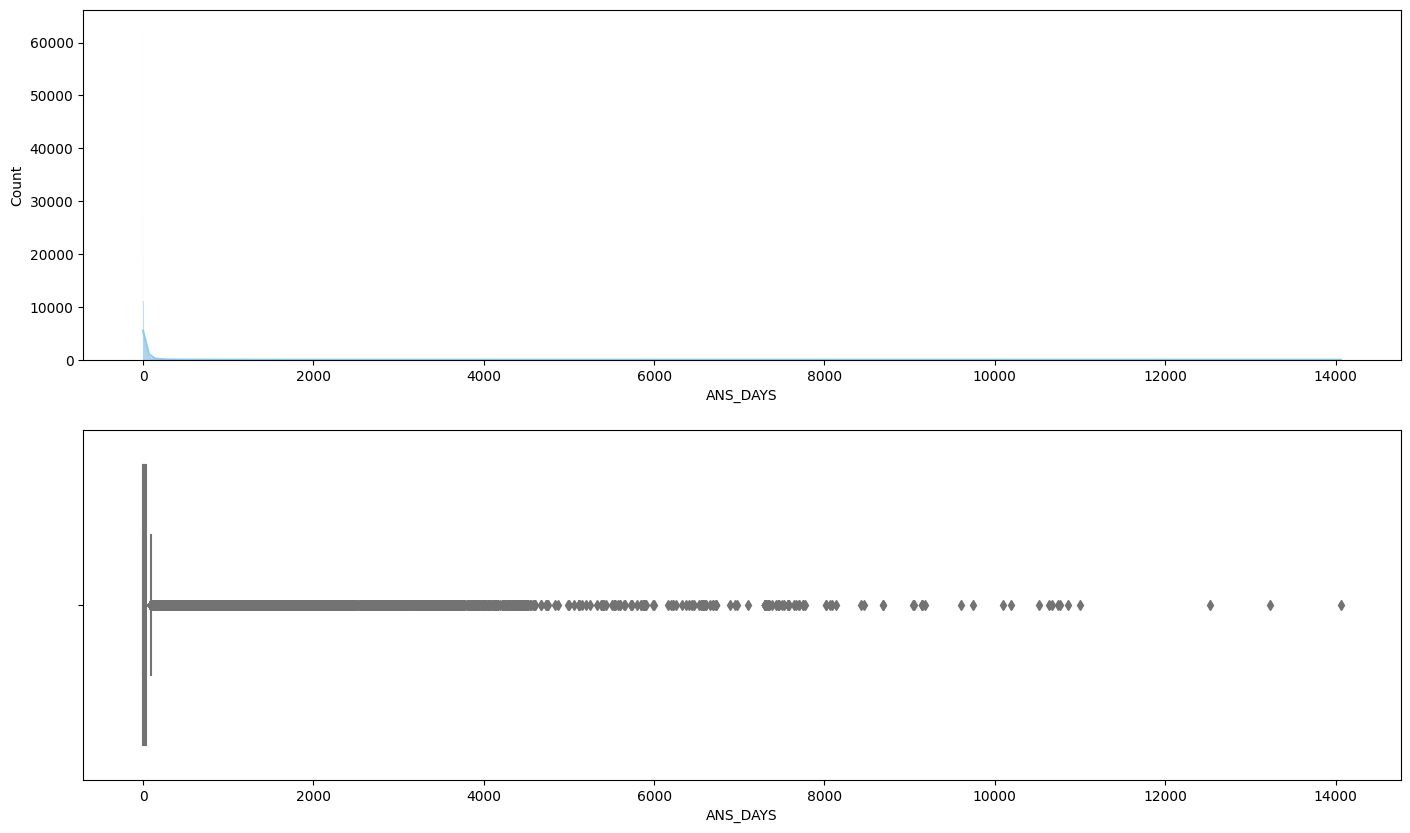

In [ ]:
fig, axs = plt.subplots(figsize=[17, 10], nrows=2)

ax1 = sns.histplot(x=df2["ANS_DAYS"],kde=True,color="lightskyblue", ax = axs[0])

ax2 = sns.boxplot(x=df2["ANS_DAYS"],color="lightskyblue", ax = axs[1])       

plt.show()

In [ ]:
#Función para calcular IQR

def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[ ((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR))) ]
   return outliers

In [ ]:
outliers = find_outliers_IQR(df2["ANS_DAYS"])

print('número de outliers: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)

número de outliers: 46162
max valor outlier: 14061
min valor outlier: 95
228        431
339        127
380       1160
459        117
460        366
          ... 
491973    3435
491974    3123
491975    4400
491976    5602
491977    8022
Name: ANS_DAYS, Length: 46162, dtype: int64


In [ ]:
# Crera una función para para encontrar outliers con  IQR

def drop_outliers_IQR(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   
   # No outliers
   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   
   # datos limpios
   outliers_clean = not_outliers.dropna().reset_index()

   return outliers_clean

In [ ]:
# LLamamos la función

outliers_clean = drop_outliers_IQR(df2["ANS_DAYS"])

print('number of outliers: '+ str(len(outliers_clean)))
print('max outlier value: ' + str(outliers_clean.max()))
print('min outlier value: ' + str(outliers_clean.min()))

print(outliers_clean)

number of outliers: 391441
max outlier value: index       491969
ANS_DAYS        94
dtype: int64
min outlier value: index       1
ANS_DAYS    0
dtype: int64
         index  ANS_DAYS
0            1         0
1            2         0
2            4         0
3           19         0
4           31         0
...        ...       ...
391436  491948        66
391437  491949        66
391438  491967         9
391439  491968         9
391440  491969         9

[391441 rows x 2 columns]


In [ ]:
# Identificamos los valores máximo y mínimo 

upper_limit = df2['ANS_DAYS'].mean() + 3*df2['ANS_DAYS'].std()
lower_limit = df2['ANS_DAYS'].mean() - 3* df2['ANS_DAYS'].std()
print(lower_limit)
print(upper_limit)

-707.0525870080061
824.9426791691659


con los limites

In [ ]:
# cuando filtered_df['ANS_DAYS'] > upper_limit colocar upper limit
# cuando filtered_df['ANS_DAYS'] < lower_limit colocar lower_limit

df2['ANS_DAYS'] = np.where(df2['ANS_DAYS'] > upper_limit, upper_limit, np.where( df2['ANS_DAYS'] < 0,lower_limit, df2['ANS_DAYS']))

df2['ANS_DAYS']

1           0.000000
2           0.000000
4           0.000000
19          0.000000
31          0.000000
             ...    
491973    824.942679
491974    824.942679
491975    824.942679
491976    824.942679
491977    824.942679
Name: ANS_DAYS, Length: 437603, dtype: float64

In [ ]:
df2.describe()

,TOTALNUMBERVICTIMS,TOTALSUSPECTS,YEAR,MONTH,ANS_DAYS
count,437603.000000,437603.000000,437603.000000,437603.000000,437603.000000
mean,1.420763,1.298161,2015.846461,6.716812,46.646077
std,2.815803,0.863464,3.751632,3.334716,115.223582
min,1.000000,1.000000,1981.000000,1.000000,0.000000
25%,1.000000,1.000000,2013.000000,4.000000,2.000000
50%,1.000000,1.000000,2016.000000,7.000000,11.000000
75%,1.000000,1.000000,2019.000000,9.000000,39.000000
max,126.000000,24.000000,2023.000000,12.000000,824.942679


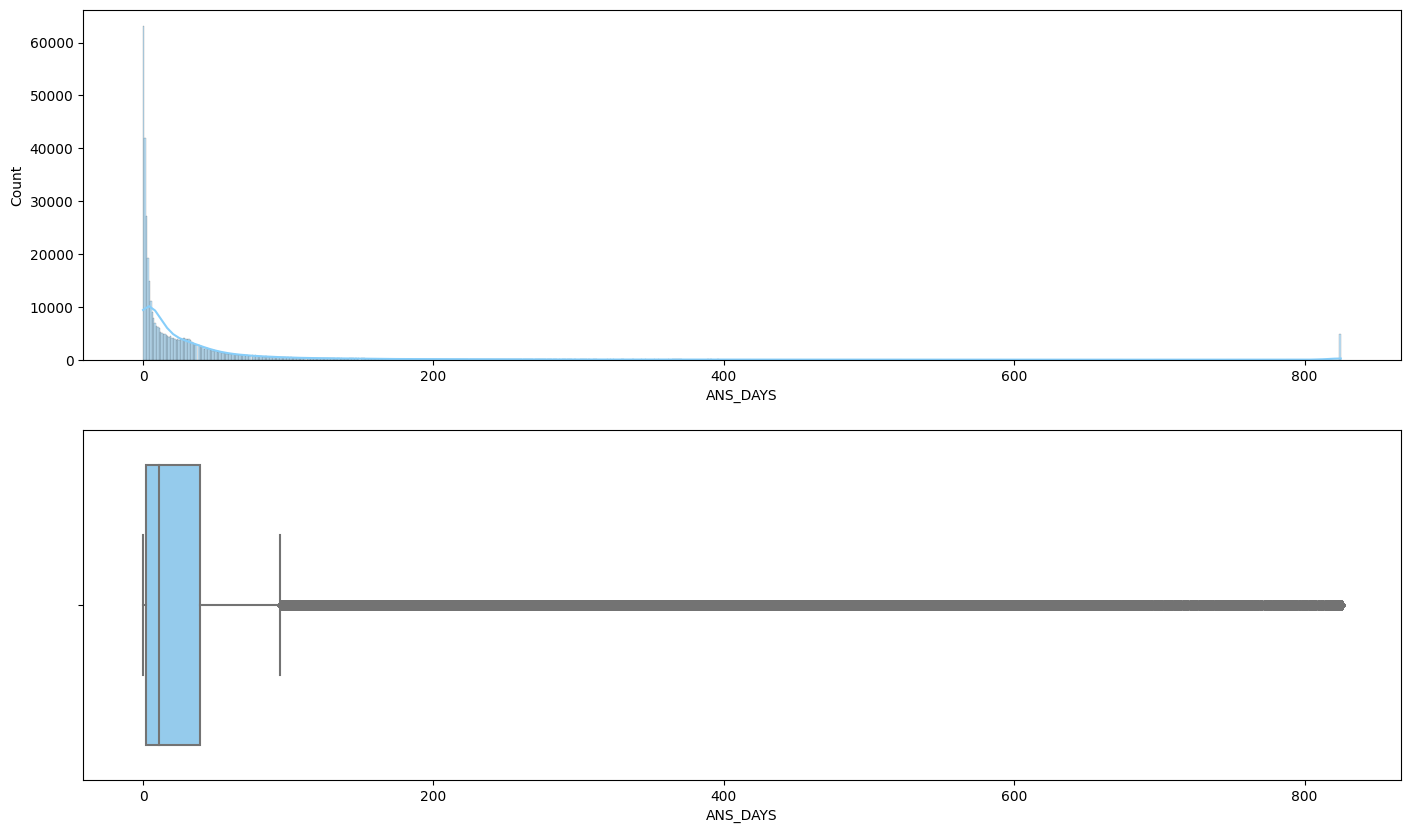

In [ ]:
fig, axs = plt.subplots(figsize=[17, 10], nrows=2)

ax1 = sns.histplot(x=df2["ANS_DAYS"],kde=True,color="lightskyblue", ax = axs[0])

ax2 = sns.boxplot(x=df2["ANS_DAYS"],color="lightskyblue", ax = axs[1])       

plt.show()

# **4. Análisis univariado estadístico y gráfico (distribución, tendencia)**

Ahora bien, una vez tratados todos los datos nulos presentes en las variables de interés, hacemos una copia de esta base para continuar con el análisis univariado.

In [ ]:
df3 = df2.copy()
df3.columns

Index(['DATE_REPORTED', 'DATE_FROM', 'DATE_TO', 'CLSD', 'DST', 'LOCATION',
       'HATE_BIAS', 'WEAPONS', 'DATE_OF_CLEARANCE', 'HOUR_FROM', 'VICTIM_AGE',
       'VICTIM_RACE', 'VICTIM_ETHNICITY', 'VICTIM_GENDER', 'SUSPECT_AGE',
       'SUSPECT_RACE', 'SUSPECT_ETHNICITY', 'SUSPECT_GENDER',
       'TOTALNUMBERVICTIMS', 'TOTALSUSPECTS', 'UCR_GROUP', 'SNA_NEIGHBORHOOD',
       'DAY', 'YEAR', 'MONTH', 'ANS_DAYS'],
      dtype='object')

# **Análisis Gráfico**:

Generamos algunos gráficos para comprender los datos. Al analizar el número de crímenes por año, se evidencia que los datos previos al 2011 no son significativos, por lo que podríamos eliminarlos. De igual forma, dado que 2023 es un año en curso, no debería tenerse en cuenta para este propósito.


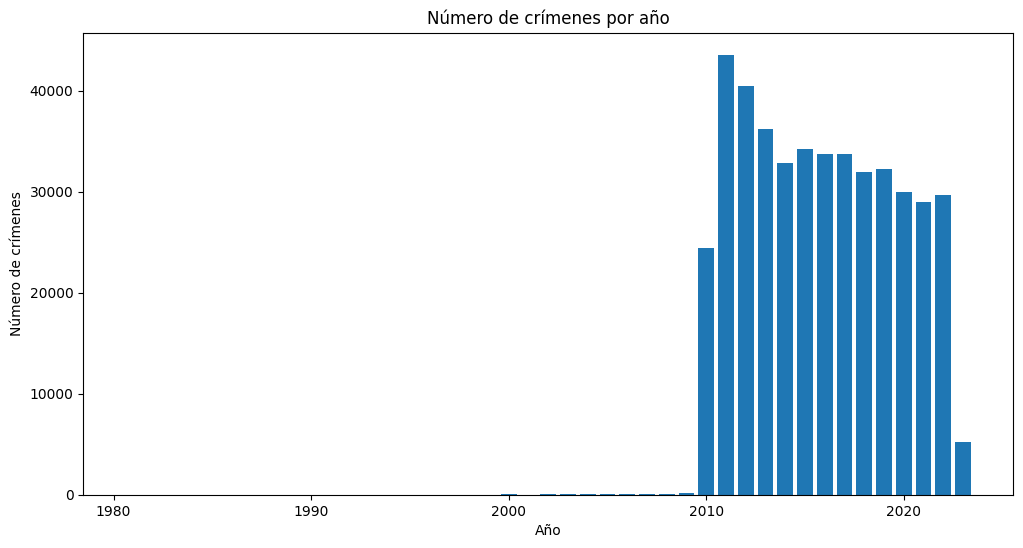

In [ ]:
# Agrupar los datos por año y contar el número de crímenes
grouped_df = df3.groupby('YEAR')['YEAR'].count()

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de barras
ax.bar(grouped_df.index, grouped_df.values)

# Agregar un título y etiquetas de los ejes
ax.set_title('Número de crímenes por año')
ax.set_xlabel('Año')
ax.set_ylabel('Número de crímenes')

# Mostrar el gráfico
plt.show()

## **Acotamos el ejercicio a sólo los últimos años y creamos otros gráficos:**

De acuerdo con la gráfica anterior, se evidencia que los datos previos al 2011 no son significativos, por lo que podríamos eliminarlos. De igual forma, dado que 2023 es un año en curso, no debería tenerse en cuenta para este propósito. Por tanto, filtramos la base para que contenga los datos entre 2011 y 2022.

In [ ]:
# Filtrar los datos para incluir solo los años de ocurrencia del crimen (extraidos de DATE_FROM) mayores a 2017 y menores a 2023:
filtered_df = df3[(df3['YEAR'] > 2017) & (df3['YEAR'] < 2023)]
filtered_df.head(3)

,DATE_REPORTED,DATE_FROM,DATE_TO,CLSD,DST,LOCATION,HATE_BIAS,WEAPONS,DATE_OF_CLEARANCE,HOUR_FROM,...,SUSPECT_ETHNICITY,SUSPECT_GENDER,TOTALNUMBERVICTIMS,TOTALSUSPECTS,UCR_GROUP,SNA_NEIGHBORHOOD,DAY,YEAR,MONTH,ANS_DAYS
205,2023-03-09 14:30:00,2022-12-11 00:00:00,2023-03-08 21:00:00,Z--EARLY CLOSED,3,01-SINGLE FAMILY,N--NO BIAS/NOT APPLICABLE,99 - NONE,2023-03-10 00:00:00,00:00:00,...,UNKNOWN,UNKNOWN,1,1,BURGLARY/BREAKING ENTERING,WESTWOOD,Sunday,2022,12,89.0
228,2023-03-08 11:20:43,2022-01-01 00:00:00,2023-03-07 00:00:00,I--INVESTIGATION PENDING,2,77-OTHER,N--NO BIAS/NOT APPLICABLE,99 - NONE,2023-03-08 11:20:43,00:00:00,...,UNKNOWN,UNKNOWN,1,1,PART 2 MINOR,EAST WALNUT HILLS,Saturday,2022,1,431.0
339,2023-03-08 21:18:20,2022-11-01 13:51:00,2022-11-01 14:00:00,H--WARRANT ISSUED,3,01-SINGLE FAMILY,88--DOMESTIC VIOLENCE,80 - OTHER WEAPON,2023-03-08 00:00:00,13:51:00,...,NOT OF HISPANIC ORIG,MALE,1,1,PART 2 MINOR,WEST PRICE HILL,Tuesday,2022,11,127.0


## **Gráficos de crimenes por cada año:**

A continuación gráficamos la frecuencia de crímenes cometidos por año. Si bien 2018 y 2019 tienen unas cifras altas, estos valores disminuyen para el 2020 y 2021, justo en pandemia, debido al confinamiento. Los valores comienzan a aumentan a partir del 2022.

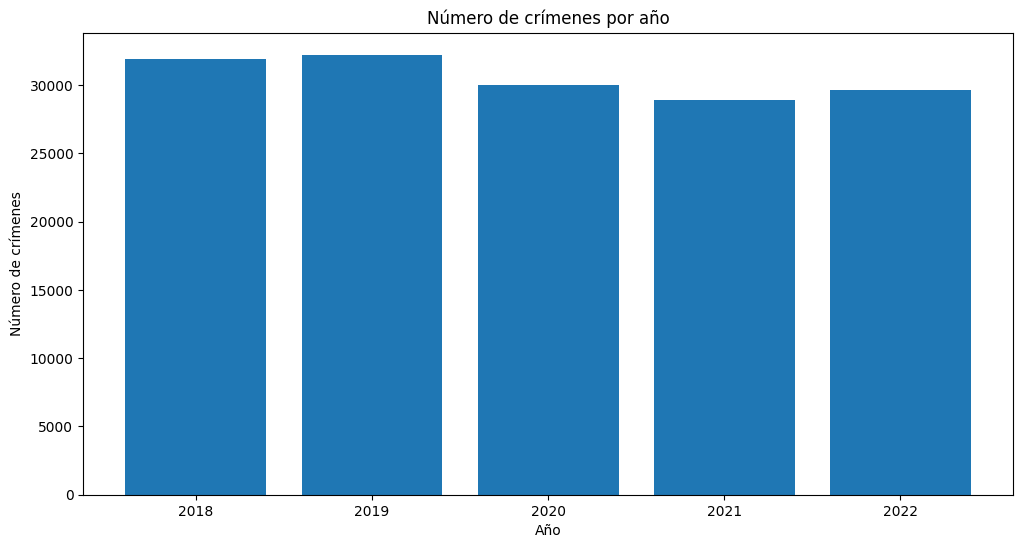

In [ ]:
# Agrupar los datos por año y contar el número de crímenes
grouped_df = filtered_df.groupby('YEAR')['YEAR'].count()

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de barras
ax.bar(grouped_df.index, grouped_df.values)

# Agregar un título y etiquetas de los ejes
ax.set_title('Número de crímenes por año')
ax.set_xlabel('Año')
ax.set_ylabel('Número de crímenes')

# Mostrar el gráfico
plt.show()

## **Gráfico de Barras Conteo total de crimenes por mes**

A continuación gráficamos la frecuencia de crímenes cometidos por año. Si bien los diferentes años comienzan con valores relativamente bajos en Enero y especialmente en **Febrero**, estas cifras aumentan considerablemente para los meses de **Julio** y Agosto, que coinciden con las vacaciones de verano, donde las personas tienen más tiempo libre y probablemente clima mucho más agreste de lo normal.

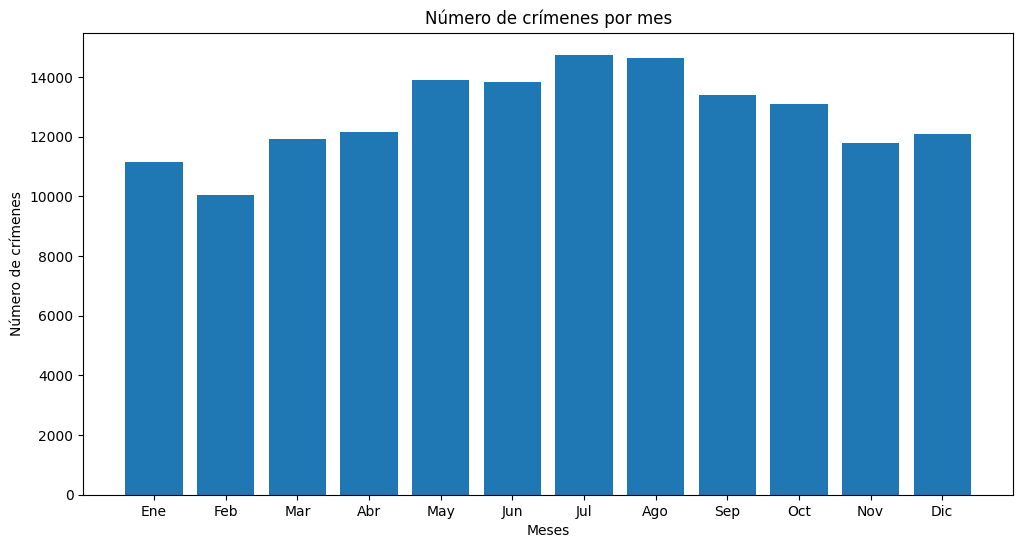

In [ ]:
# Diccionario de nombres de los meses
month_names = {1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'}

# Agrupar los datos por mes y contar el número de crímenes
grouped_df = filtered_df.groupby('MONTH')['MONTH'].count().rename(month_names)

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de barras
ax.bar(grouped_df.index, grouped_df.values)

# Agregar un título y etiquetas de los ejes
ax.set_title('Número de crímenes por mes')
ax.set_xlabel('Meses')
ax.set_ylabel('Número de crímenes')

# Mostrar el gráfico
plt.show()

## **Gráfico Conteo total de crimenes por día de la semana:**

A continuación gráficamos la frecuencia de crímenes cometidos por año. Si bien los diferentes años comienzan con valores relativamente bajos en Enero y especialmente en Febrero, estas cifras aumentan considerablemente para los meses de Julio y Agosto, que coinciden con las vacaciones de verano, donde las personas tienen más tiempo libre y probablemente clima mucho más cálido de lo normal.

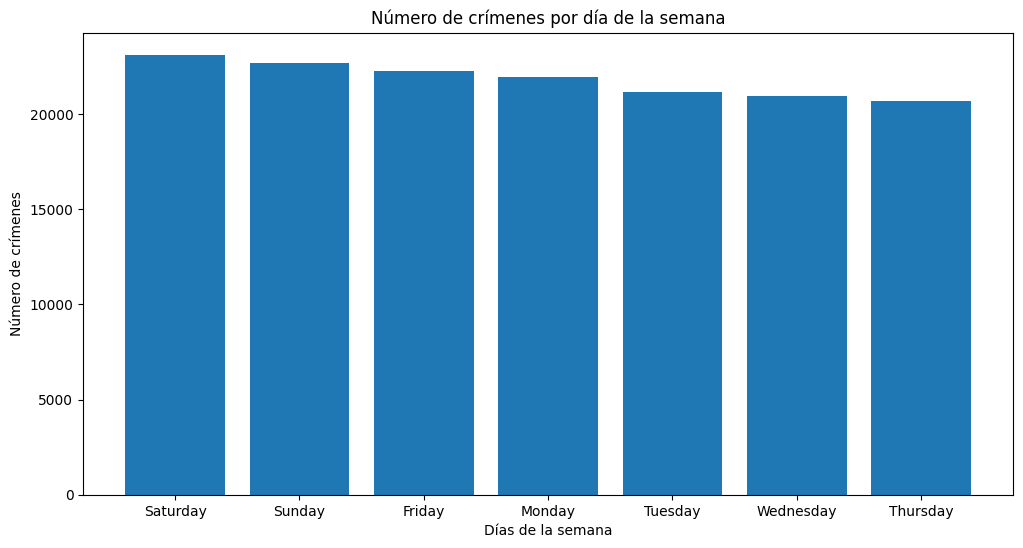

In [ ]:
# Agrupar los datos por mes y contar el número de crímenes
grouped_df = filtered_df.groupby('DAY')['DAY'].count().sort_values(ascending=False)

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de barras
ax.bar(grouped_df.index, grouped_df.values)

# Agregar un título y etiquetas de los ejes
ax.set_title('Número de crímenes por día de la semana')
ax.set_xlabel('Días de la semana')
ax.set_ylabel('Número de crímenes')

# Mostrar el gráfico
plt.show()

## **Gráfico de número promedio de días que tarda la prespuesta policiaca:**

Es evidente que si bien, antes del 2020 había un tiempo promedio de respuesta elevado, durante la crisis sanitaria del 2020 de la pandemia por COVID 19, se disparó considerablemente dicho promedio, por tanto, durante ese año se observa un pico importante de tardanza. 

No obstante, éste promedio se restablece después, para el 2021 y durante el 2022 fue considerablemente menor. De hecho, es posible que estos menores tiempos de tardanza, hayan sido producto de la digitalización acelerada que se vivió durante el 2020, y por tanto, se esté presentando una mayor eficiencia en la atención de estos eventos, lo que se traduce en un menor tiempo de espera.

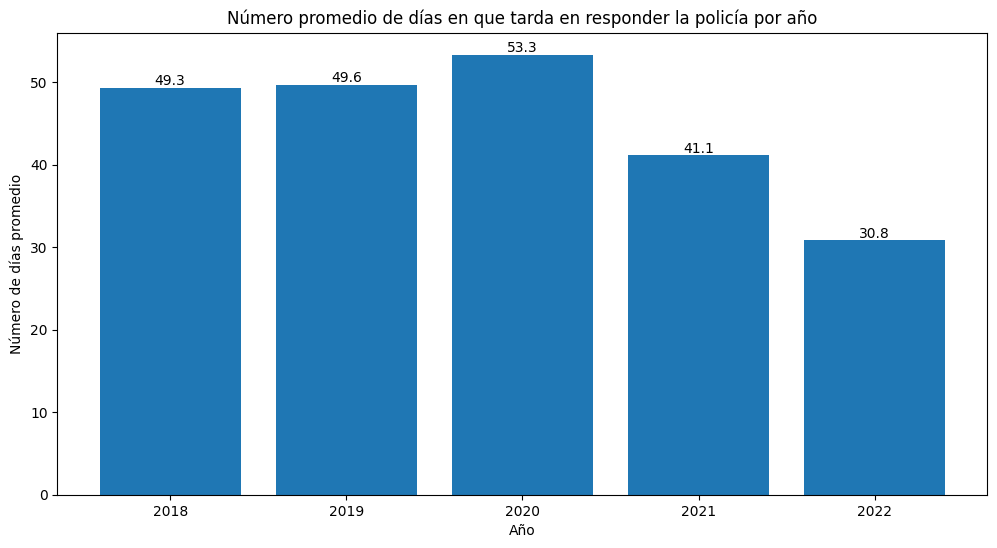

In [ ]:
# Agrupar los datos por año y contar el número de crímenes
grouped_df = filtered_df.groupby('YEAR')['ANS_DAYS'].mean().round(1)

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de barras
ax.bar(grouped_df.index, grouped_df.values)
ax.bar_label(ax.containers[0])

# Agregar un título y etiquetas de los ejes
ax.set_title('Número promedio de días en que tarda en responder la policía por año')
ax.set_xlabel('Año')
ax.set_ylabel('Número de días promedio')

# Mostrar el gráfico
plt.show()

## **Gráfico de Barras Conteo total de CLSD:**

Recordemos que CLSD es el resultado del incidente, es decir, la solución o el estado asignado al caso criminal. 

Al analizar el tipo de respuesta que da la policia a la victima de un crimen, encontramos que **cerrado tempranamente** y **cerrado** son las respuestas más usuales, mientras que **muerte del criminal** y **criminal juvenil o sin custodia** son las menos comunes.

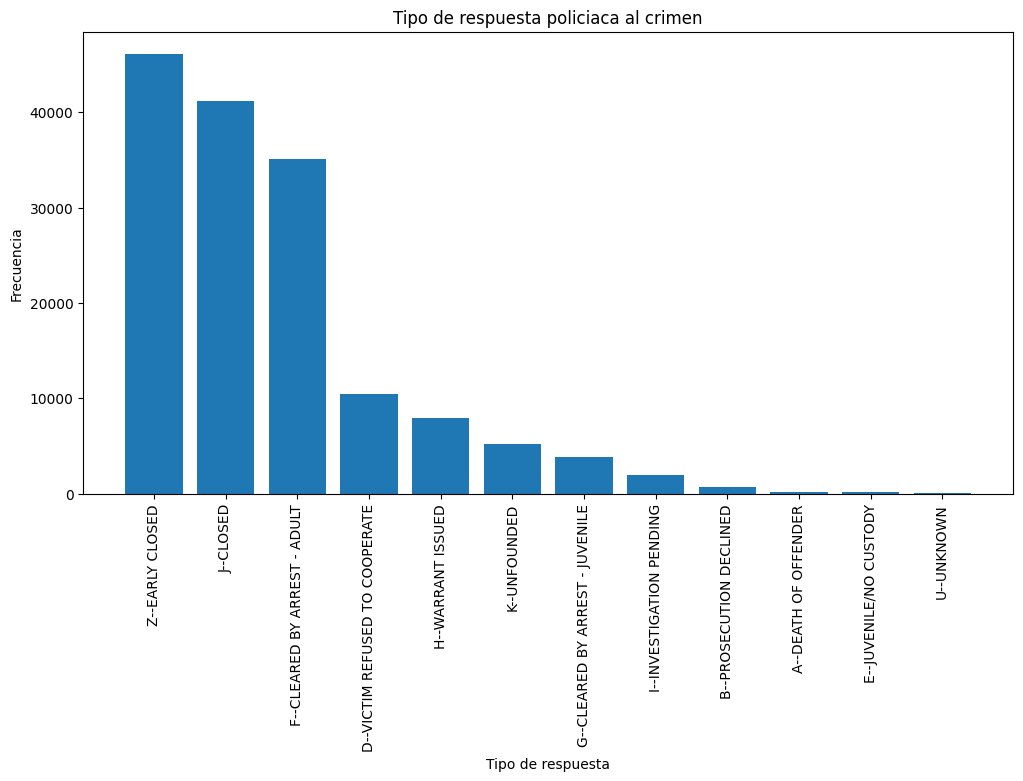

In [ ]:
# Agrupar los datos por año y contar el número de crímenes
grouped_df = filtered_df.groupby('CLSD')['CLSD'].count().sort_values(ascending=False)

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de barras
ax.bar(grouped_df.index, grouped_df.values)

# Agregar un título y etiquetas de los ejes
ax.set_title('Tipo de respuesta policiaca al crimen')
ax.set_xlabel('Tipo de respuesta')
ax.set_ylabel('Frecuencia')
ax.tick_params(axis='x', labelrotation=90)

# Mostrar el gráfico
plt.show()

## **Gráfico de Barras Conteo total de DST:**

In [ ]:
filtered_df['DST'].unique()

array(['3', '2', '4', '1', '5', 'UNKNOWN'], dtype=object)

Recordemos que DST es el distrito donde ocurrió el crimen. 

Al analizar esta variable observamos que los distritos con mayor número de crímenes son: el **distrito 3** y el **distrito 4**. Mientras que los **distritos 1** y **2** son aquellos que tienen menor tasa de crímenes. Más adelante en un gráfico tipo mapa geográfico analizaremos con mayor detalle esta distribución de crímenes.


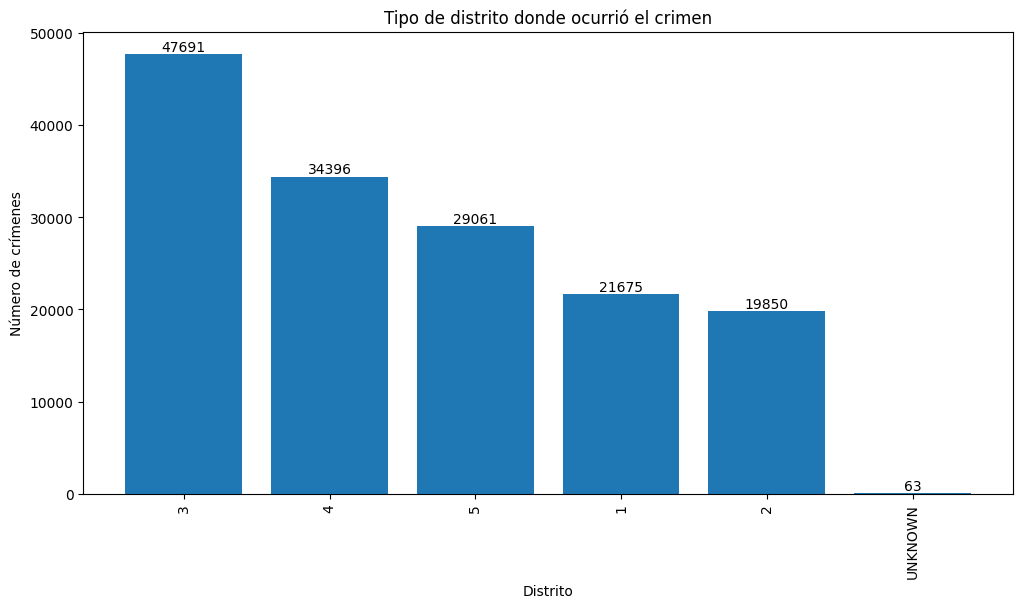

In [ ]:
# Agrupar los datos por año y contar el número de crímenes
grouped_df = filtered_df.groupby('DST')['DST'].count().sort_values(ascending=False)
# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de barras
ax.bar(grouped_df.index, grouped_df.values)

# Agregar un título y etiquetas de los ejes
ax.set_title('Tipo de distrito donde ocurrió el crimen')
ax.set_xlabel('Distrito')
ax.set_ylabel('Número de crímenes')
ax.tick_params(axis='x', labelrotation=90)
ax.bar_label(ax.containers[0])

# Mostrar el gráfico
plt.show()

## **Gráfico de total de crimenes por odio:**

Si bien, en su mayoría, los crímenes de Cincinnati no son identificados como crímenes de odio. Un pequeño porcentaje de ellos lo son. Entre estos, los más comunes son los crímenes por **violencia doméstica, guerras de pandillas, crímenes anti-blancos y crímenes anti-afros**.

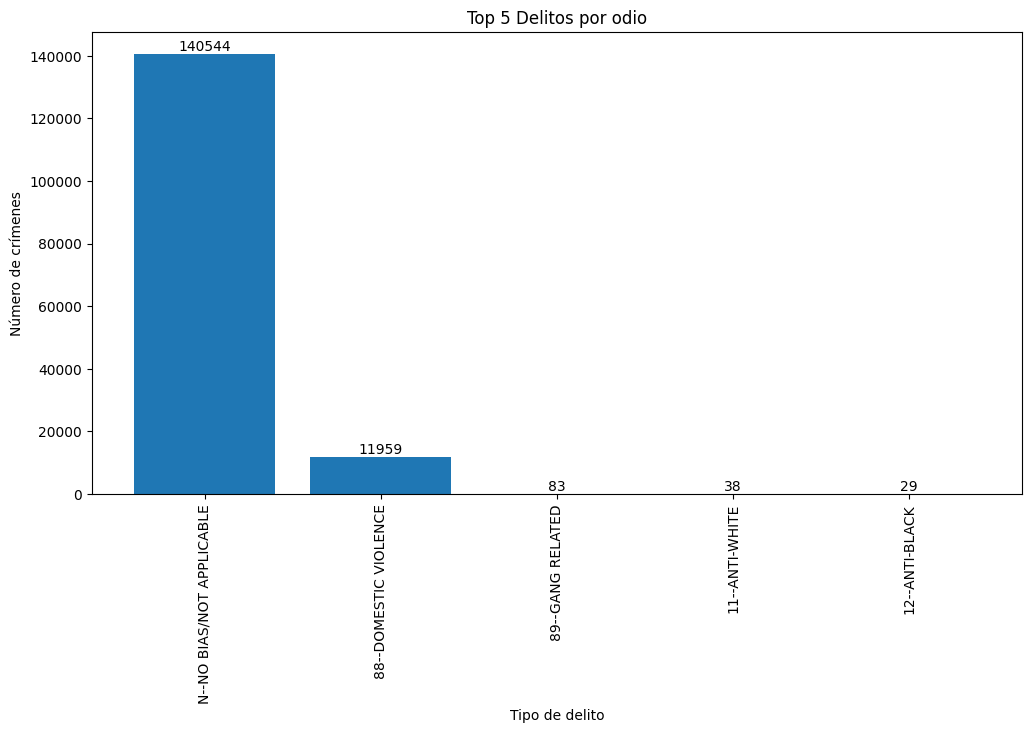

In [ ]:
# Agrupar los datos por año y contar el número de crímenes
grouped_df = filtered_df.groupby('HATE_BIAS')['HATE_BIAS'].count().sort_values(ascending=False)[:5]

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de barras
ax.bar(grouped_df.index, grouped_df.values)

# Agregar un título y etiquetas de los ejes
ax.set_title('Top 5 Delitos por odio')
ax.set_xlabel('Tipo de delito')
ax.set_ylabel('Número de crímenes')
ax.tick_params(axis='x', labelrotation=90)
ax.bar_label(ax.containers[0])

# Mostrar el gráfico
plt.show()

## **Gráfico de Conteo total de localización del crímen:**

Recordemos que **LOCATION** es el lugar físico donde ocurren los delitos, a nivel de ubicación física, no geográfica.

Al analizar esta variable es evidente que en su mayoría, los crímenes en Cincinnati ocurren principalmente en las **viviendas multifamiliares**, en la **calle** y en las **viviendas unifamiliares**.

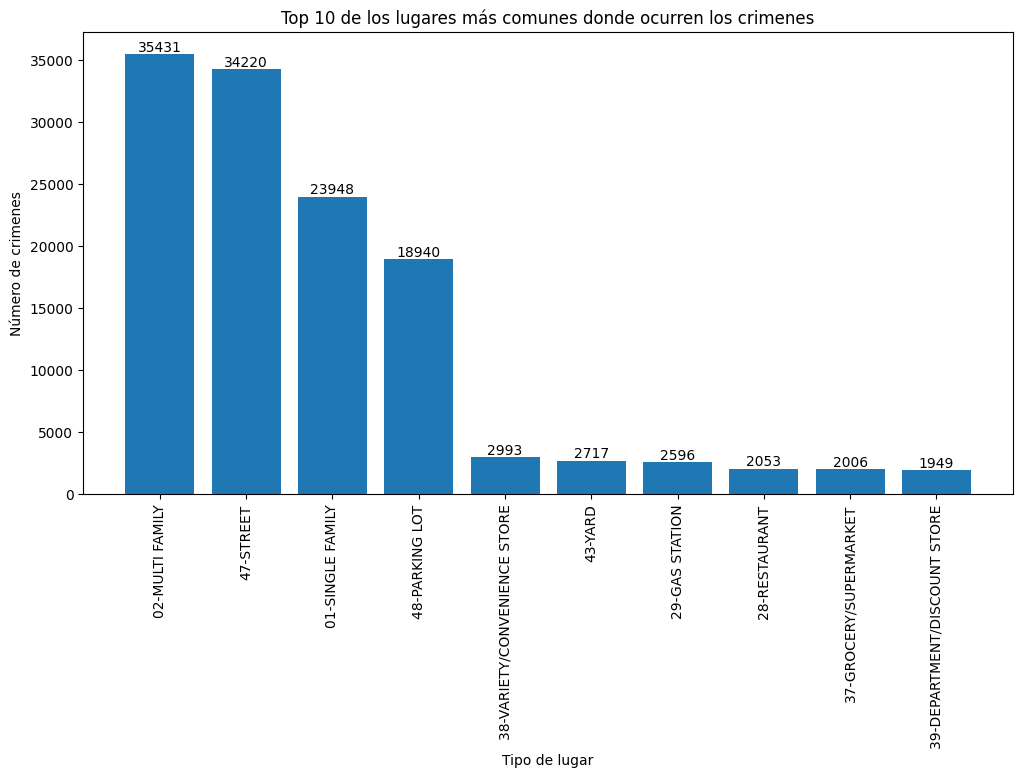

In [ ]:
# Agrupar los datos por año y contar el número de crímenes
grouped_df = filtered_df.groupby('LOCATION')['LOCATION'].count().sort_values(ascending=False)[:10]

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de barras
ax.bar(grouped_df.index, grouped_df.values)

# Agregar un título y etiquetas de los ejes
ax.set_title('Top 10 de los lugares más comunes donde ocurren los crimenes')
ax.set_xlabel('Tipo de lugar')
ax.set_ylabel('Número de crimenes')
ax.tick_params(axis='x', labelrotation=90)
ax.bar_label(ax.containers[0])

# Mostrar el gráfico
plt.show()

## **Gráfico de Barras Conteo total de Armas:**

Al analizar la variable del tipo de arma usada, es posible observar que en su mayoría, los crímenes registrados no se caracterizan por tener armas involucradas, es posible que se trate de delitos del tipo robos a casas sin presencia de alguien o "cosquilleo", en inglés pickpocket. 

No obstante, hay una cantidad considerable de crímenes que sí registra uso de armas. Estas armas pueden ser desde el cuerpo mismo del criminal (manos, puños, patadas, etc) hasta armas de fuego u objetos cortopunzantes. De estas, la que más se repite son las armas donde el cuerpo es el protagonista (**personal weapons**) y las que menos se presentan son las armas de cacería con perdigones (**pellet gun**). 

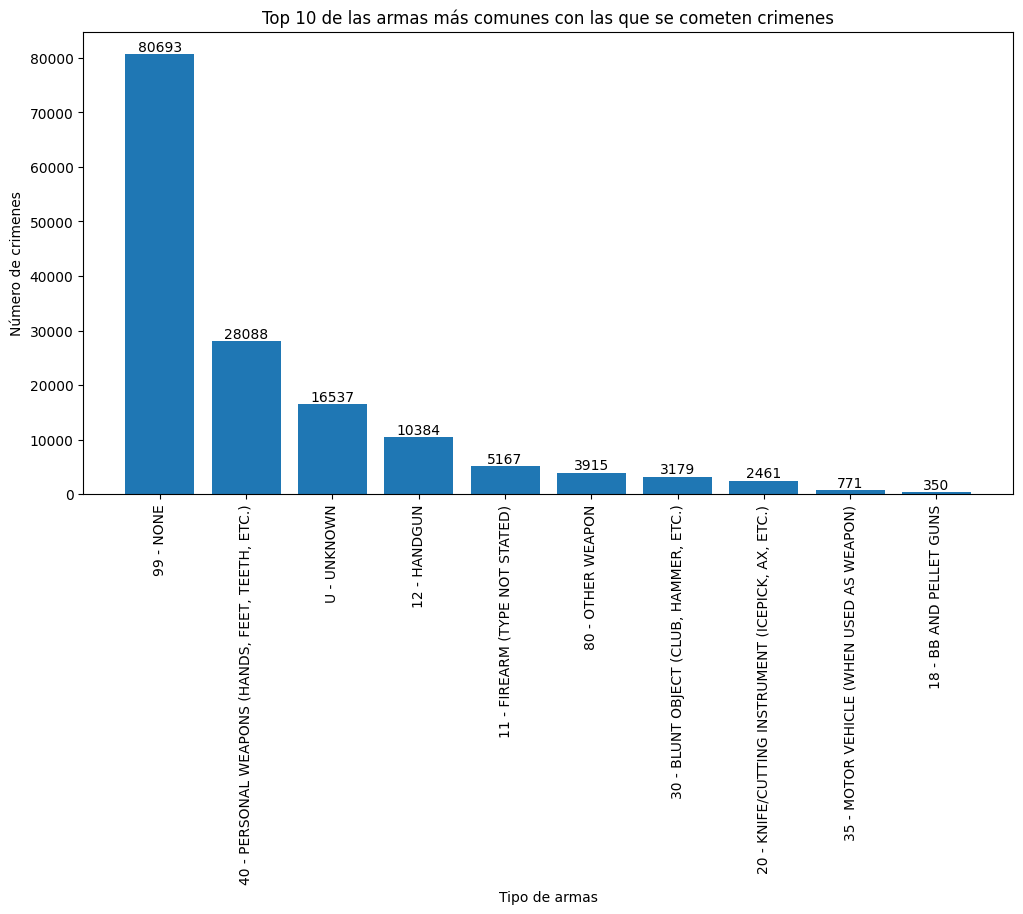

In [ ]:
# Agrupar los datos por año y contar el número de crímenes
grouped_df = filtered_df.groupby('WEAPONS')['WEAPONS'].count().sort_values(ascending=False)[:10]

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el gráfico de barras
ax.bar(grouped_df.index, grouped_df.values)

# Agregar un título y etiquetas de los ejes
ax.set_title('Top 10 de las armas más comunes con las que se cometen crimenes')
ax.set_xlabel('Tipo de armas')
ax.set_ylabel('Número de crimenes')
ax.tick_params(axis='x', labelrotation=90)
ax.bar_label(ax.containers[0])

# Mostrar el gráfico
plt.show()


## **Gráfico de género de victimas y sospechosos**

Al analizar la distribución por género de víctimas y sospechosos, hay que tener en cuenta que algunos de estos son personas jurídicas, por tanto no tienen género (Not Human) o se desconoce en caso de que no se haya podido identificar.

Ahora bien, se observa que casi el 50% de las víctimas son mujeres. El porcentaje restante se distribuye entre hombres (37%) y desconocido (14%). De otro lado, si bien el 50% de los sospechosos son desconocidos y por ende, su género también, hay un gran porcentaje de hombres victimarios identificados (37%) en contraste con el porcentaje de mujeres victimarias (14%).

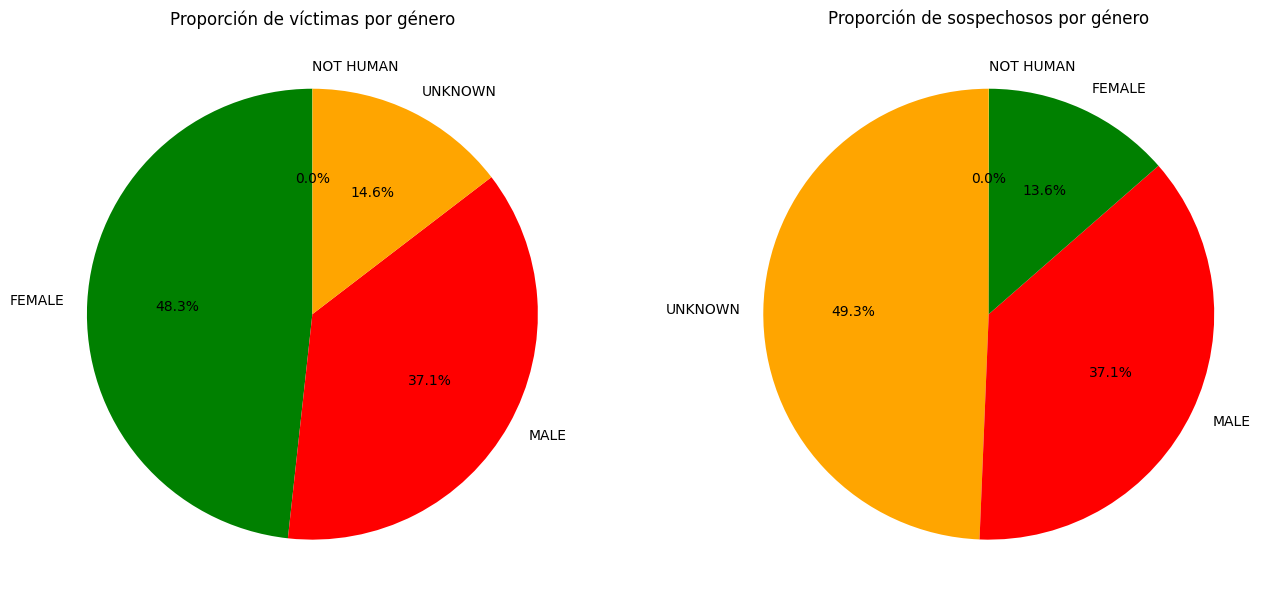

In [ ]:
# Contar el número de víctimas y sospechosos por género
gender_Victim_counts = filtered_df['VICTIM_GENDER'].value_counts()
gender_Suspect_counts = filtered_df['SUSPECT_GENDER'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

# Definir los colores para los géneros
colores = {'MALE': 'red', 'FEMALE': 'green', 'UNKNOWN': 'orange', 'NOT HUMAN': 'yellow'}

# Crear un gráfico de pastel para visualizar la proporción de víctimas por género
ax1.pie(gender_Victim_counts.values, labels=gender_Victim_counts.index, autopct='%1.1f%%', startangle=90, colors=[colores[x] for x in gender_Victim_counts.index])
# Agregar un título
ax1.set_title('Proporción de víctimas por género')

# Crear un gráfico de pastel para visualizar la proporción de sospechosos por género
ax2.pie(gender_Suspect_counts.values, labels=gender_Suspect_counts.index, autopct='%1.1f%%', startangle=90, colors=[colores[x] for x in gender_Suspect_counts.index])
# Agregar un título
ax2.set_title('Proporción de sospechosos por género')

plt.show()

## **Gráficos de datos demográficos Victimas:**

Al analizar más datos demográficos de las victimas, se puede observar que son en su mayoría, personas jóvenes, probalemente mujeres por lo que analizamos en el gráfico anterior. Sus edades rondan entre los 18 y 25 años y entre los 31 y 40 años, de raza negra/afro y sin origen hispánico.  

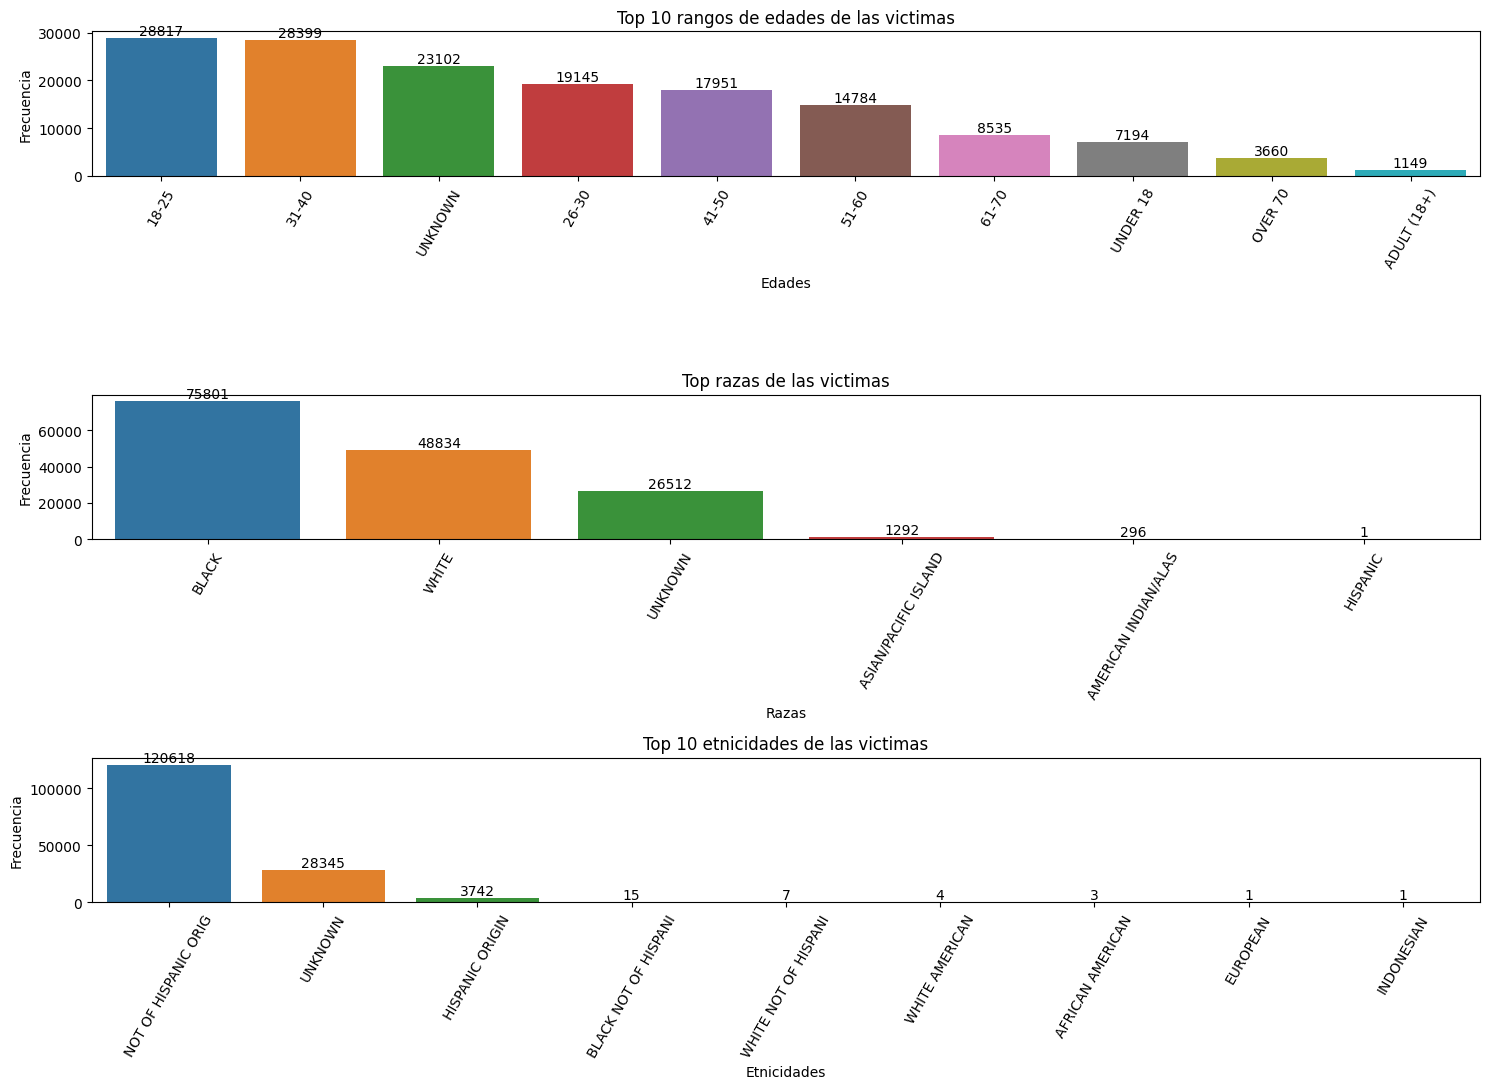

In [ ]:
fig, axs = plt.subplots(figsize=[15, 11],ncols=1, nrows=3)

grouped_df_1 = filtered_df.groupby('VICTIM_AGE')['VICTIM_AGE'].count().sort_values(ascending=False)[:10]
ax1=sns.barplot(x = grouped_df_1.index, y = grouped_df_1.values, ax=axs[0])
ax1.set_title("Top 10 rangos de edades de las victimas")
ax1.set_xlabel("Edades")
ax1.set_ylabel("Frecuencia")
ax1.tick_params(axis='x', labelrotation=60)
ax1.bar_label(ax1.containers[0])

grouped_df_2 = filtered_df.groupby('VICTIM_RACE')['VICTIM_RACE'].count().sort_values(ascending=False)[:10]
ax2=sns.barplot(x = grouped_df_2.index, y = grouped_df_2.values, ax=axs[1])
ax2.set_title("Top razas de las victimas")
ax2.set_xlabel("Razas")
ax2.set_ylabel("Frecuencia")
ax2.tick_params(axis='x', labelrotation=60)
ax2.bar_label(ax2.containers[0])

grouped_df_3 = filtered_df.groupby('VICTIM_ETHNICITY')['VICTIM_ETHNICITY'].count().sort_values(ascending=False)[:10]
ax3=sns.barplot(x = grouped_df_3.index, y = grouped_df_3.values, ax=axs[2])
ax3.set_title("Top 10 etnicidades de las victimas")
ax3.set_xlabel("Etnicidades")
ax3.set_ylabel("Frecuencia")
ax3.tick_params(axis='x', labelrotation=60)
ax3.bar_label(ax3.containers[0])

fig.tight_layout()
plt.show()

## **Gráficos de datos demográficos Sospechosos:**

Al analizar más datos demográficos de los sospechosos, se puede observar que son en su mayoría desconocidos, aunque entre los que se encuentran identificados, se visualizar que son personas jóvenes, posiblemente hombres. Sus edades rondan entre los 18 y 25 años, de raza negra/afro y sin origen hispánico.

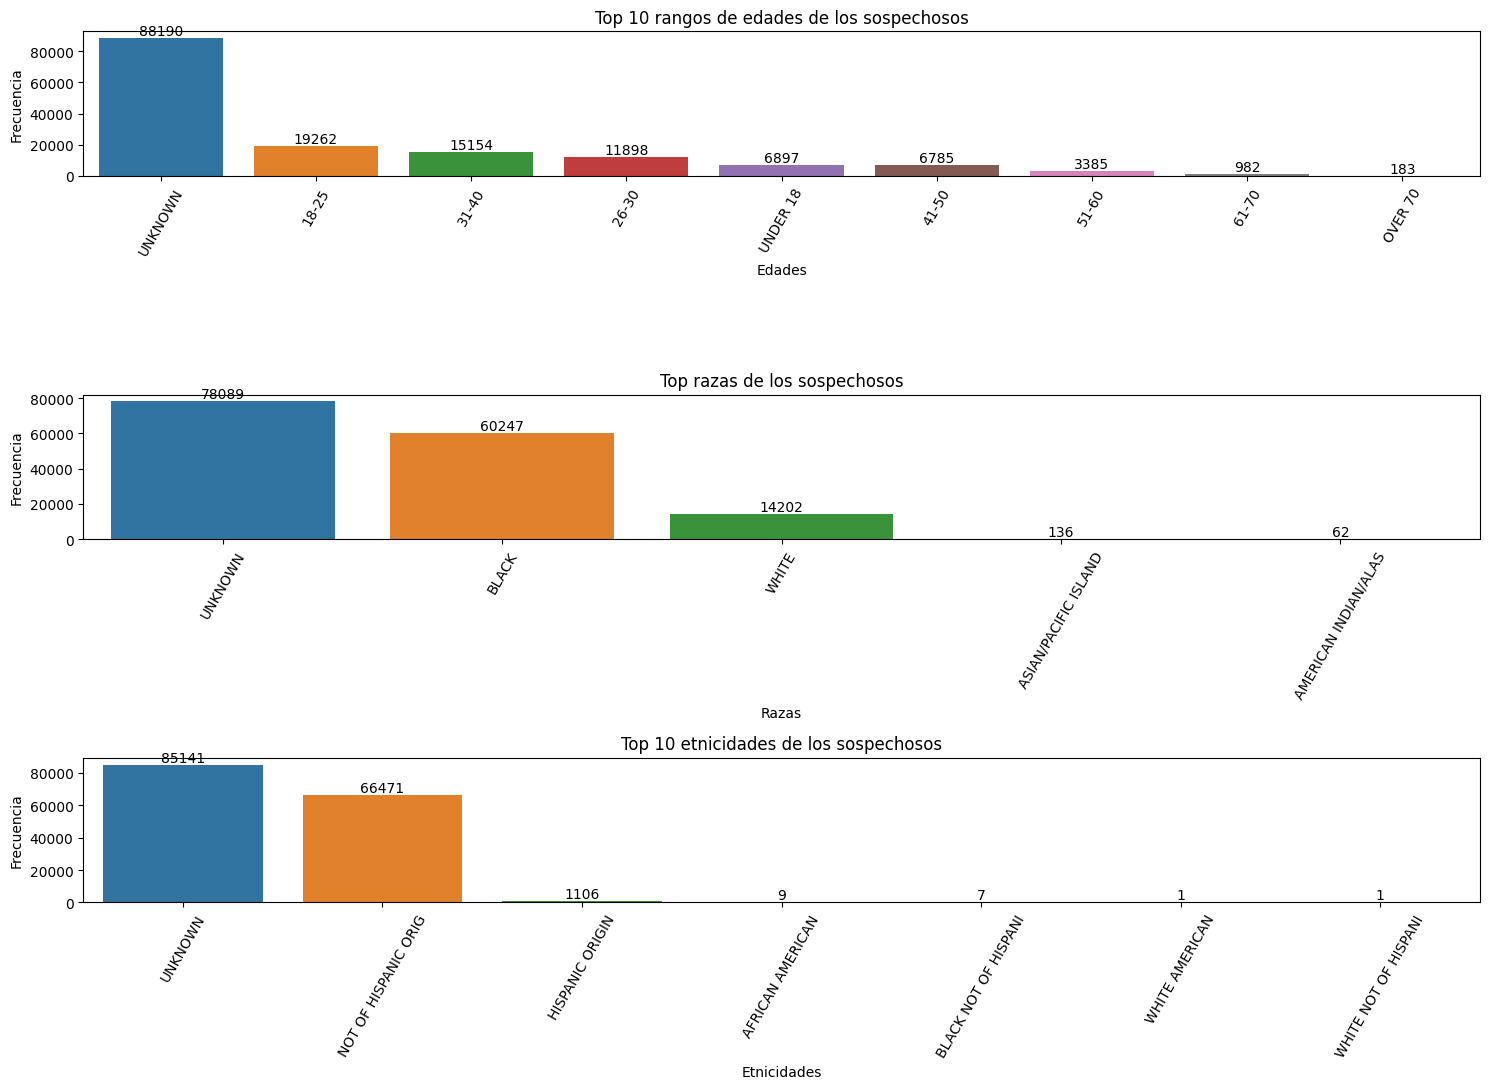

In [ ]:
fig, axs = plt.subplots(figsize=[15, 11],ncols=1, nrows=3)

grouped_df_1 = filtered_df.groupby('SUSPECT_AGE')['SUSPECT_AGE'].count().sort_values(ascending=False)[:10]
ax1=sns.barplot(x = grouped_df_1.index, y = grouped_df_1.values, ax=axs[0])
ax1.set_title("Top 10 rangos de edades de los sospechosos")
ax1.set_xlabel("Edades")
ax1.set_ylabel("Frecuencia")
ax1.tick_params(axis='x', labelrotation=60)
ax1.bar_label(ax1.containers[0])

grouped_df_2 = filtered_df.groupby('SUSPECT_RACE')['SUSPECT_RACE'].count().sort_values(ascending=False)[:10]
ax2=sns.barplot(x = grouped_df_2.index, y = grouped_df_2.values, ax=axs[1])
ax2.set_title("Top razas de los sospechosos")
ax2.set_xlabel("Razas")
ax2.set_ylabel("Frecuencia")
ax2.tick_params(axis='x', labelrotation=60)
ax2.bar_label(ax2.containers[0])

grouped_df_3 = filtered_df.groupby('SUSPECT_ETHNICITY')['SUSPECT_ETHNICITY'].count().sort_values(ascending=False)[:10]
ax3=sns.barplot(x = grouped_df_3.index, y = grouped_df_3.values, ax=axs[2])
ax3.set_title("Top 10 etnicidades de los sospechosos")
ax3.set_xlabel("Etnicidades")
ax3.set_ylabel("Frecuencia")
ax3.tick_params(axis='x', labelrotation=60)
ax3.bar_label(ax3.containers[0])

fig.tight_layout()
plt.show()

## **Gráficos de número de víctimas vs número de sospechosos:**

El número de victimas y sospechosos no muestra diferencias notables, en general, son entre 1 y 2 víctimas por crímen, números que se repiten entre los sospechosos, que también tienden a ser entre 1 y 2 victimarios en su mayoría.

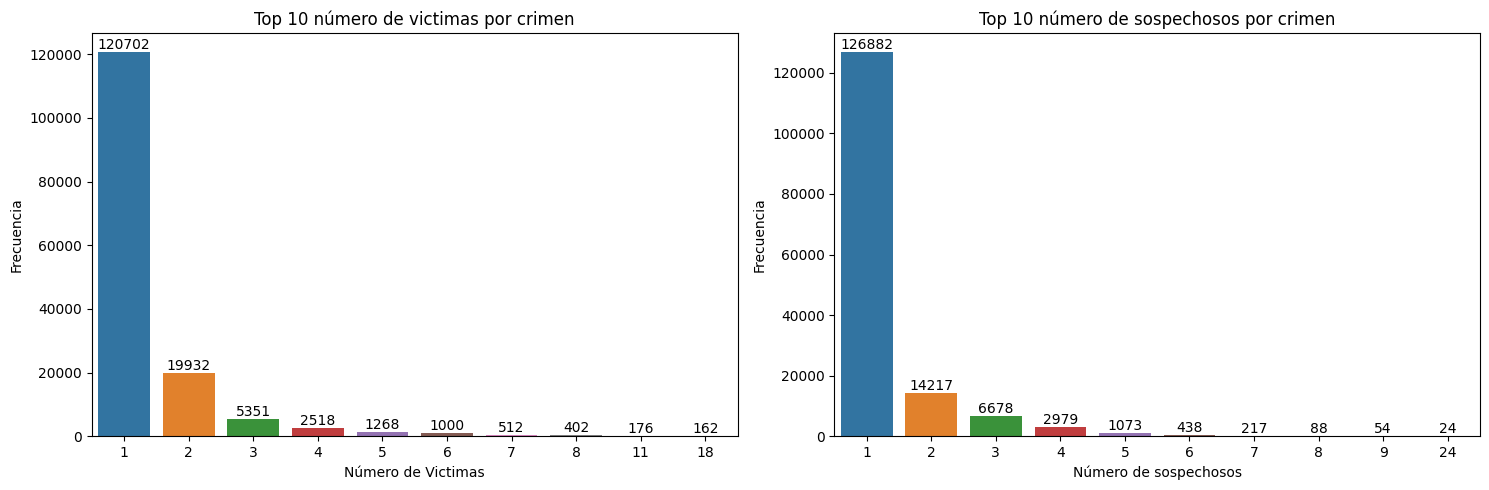

In [ ]:
fig, axs = plt.subplots(figsize=[15, 5],ncols=2, nrows=1)

grouped_df_1 = filtered_df.groupby('TOTALNUMBERVICTIMS')['TOTALNUMBERVICTIMS'].count().sort_values(ascending=False)[:10]
ax1=sns.barplot(x = grouped_df_1.index, y = grouped_df_1.values, ax=axs[0])
ax1.set_title("Top 10 número de victimas por crimen")
ax1.set_xlabel("Número de Victimas")
ax1.set_ylabel("Frecuencia")
ax1.bar_label(ax1.containers[0])

grouped_df_2 = filtered_df.groupby('TOTALSUSPECTS')['TOTALSUSPECTS'].count().sort_values(ascending=False)[:10]
ax2=sns.barplot(x = grouped_df_2.index, y = grouped_df_2.values, ax=axs[1])
ax2.set_title("Top 10 número de sospechosos por crimen")
ax2.set_xlabel("Número de sospechosos")
ax2.set_ylabel("Frecuencia")
ax2.bar_label(ax2.containers[0])

fig.tight_layout()
plt.show()

# **Análisis Multivariado:**

Al realizar el análisis multivariado, decidimos utilizar análisis de correlación, series temporales y gráficos de barras agrupados, distribuciones de frecuencia y un mapa de geolocalización por crimenes en la ciudad de Cincinnati.

# **5. Análisis de relación entre variables, estadístico y gráfico (correlación)**

Al validar la relación entre las variables numéricas, encontramos una correlación muy baja, practicamente nula entre dichas variables. Es decir, las variables no están relacionadas entre ellas y por tanto, no hay riesgo de multicolinearidad, es decir, las variables no están entregando información redundante entre ellas y en caso de querer hacer un modelo de regresión lineal o logística, se pueden usar sin riesgo.

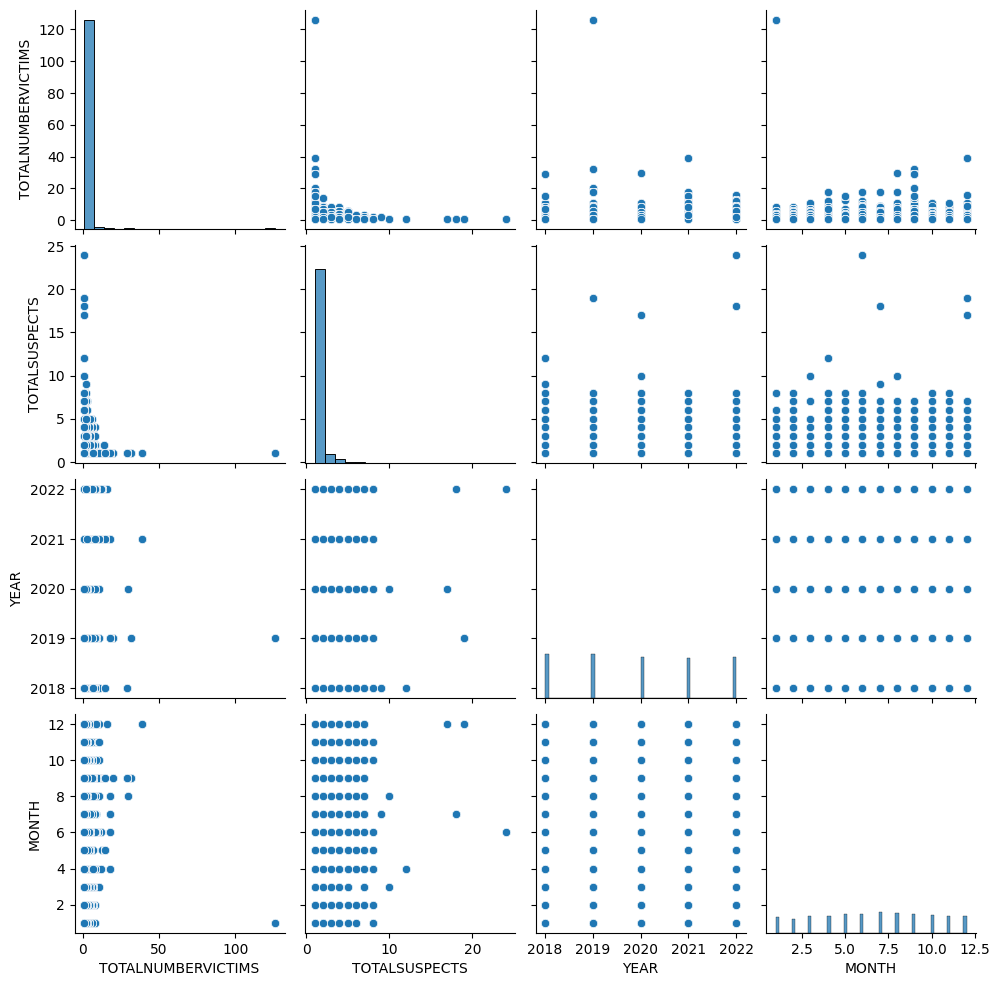

In [ ]:
df_correlacion_variables = filtered_df[['TOTALNUMBERVICTIMS',	'TOTALSUSPECTS','YEAR',	'MONTH']].reset_index()
df_correlacion_variables = df_correlacion_variables.drop(['index'],axis=1)
sns.pairplot(df_correlacion_variables)

## **Gráfico de series de número de crimenes por mes y año**

Al analizar, a través de un gráfico de series temporales la relación entre el número de crímenes por años y meses, se evidencia que durante el mes de febrero, casi todos los años, se presenta el menor número de crímenes. De otro lado, durante el mes de Julio tenemos un pico de criminalidad para los años 2018, 2020 y 2022. Mientras que para el año 2019 este pico se encuentra en Agosto y para el 2021 en Octubre.

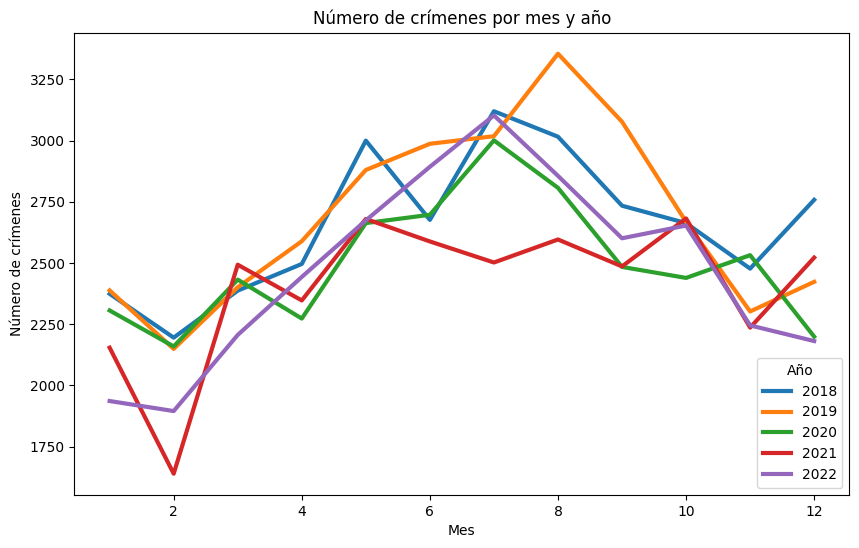

In [ ]:
# Agrupar los datos por "Year" y "Month" y contar el número de crímenes por mes
grouped_df = filtered_df.groupby(['YEAR', 'MONTH'])['YEAR'].count()

# Reorganizar los datos en un DataFrame
crime_by_year_month = grouped_df.unstack(level=0)

# Crear un gráfico de líneas con cada año como serie
crime_by_year_month.plot(kind='line', figsize=(10,6), linewidth=3)

# Personalizar el gráfico
plt.title('Número de crímenes por mes y año')
plt.xlabel('Mes')
plt.ylabel('Número de crímenes')
plt.legend(title='Año', loc='lower right')
plt.show()

## **Gráfico de series de crimenes por año y día**

Al analizar, a través de un gráfico de series temporales la relación entre el número de crímenes por días y años, se evidencia que durante el día Jueves, casi todos los años, se presenta el menor número de crímenes, la excepción ocurrió durante el 2018, suyo día de menor criominalidad fue el martes. De otro lado, el día sábado tenemos un pico de criminalidad para los años 2020, 2021 y 2022. Mientras que para el año 2019 este pico se encuentra en los días viernes y para el 2018 en los días domingos. Se podría decir que los fines de semana, es donde se encuentra mayor criminalidad.

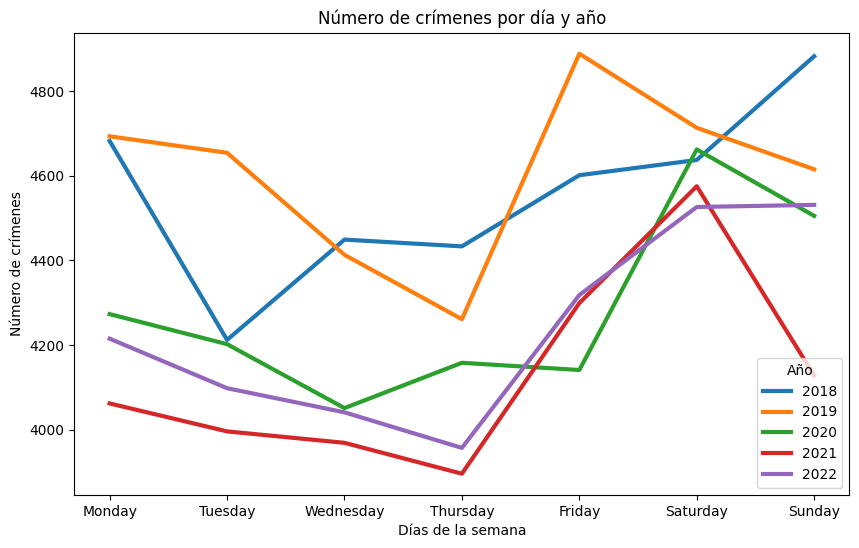

In [ ]:
# Crear una lista ordenada de los días de la semana
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Agrupar los datos por "Year" y "Día" y contar el número de crímenes por mes
grouped_df = filtered_df.groupby(['YEAR', 'DAY'])['UCR_GROUP'].count()

# Reorganizar los datos en un DataFrame y ordenar los días de la semana
crime_by_year_month = grouped_df.unstack(level=0).reindex(ordered_days)

# Crear un gráfico de líneas con cada año como serie
crime_by_year_month.plot(kind='line', figsize=(10,6), linewidth=3)

# Personalizar el gráfico
plt.title('Número de crímenes por día y año')
plt.xlabel('Días de la semana')
plt.ylabel('Número de crímenes')
plt.legend(title='Año', loc='lower right')

plt.show()


## **Gráfico de crímenes por franja horaria por año**

Al analizar, a través de un gráfico de barras agrupado por años la relación entre el número de crímenes por hora, se evidencia que, durante la franja horaria de la media noche y las 2 de la mañana, para todos los años, es donde se presenta el mayor número de crímenes. De otro lado, durante la franja horaria de entre las 3 y las 7 de la mañana, tenemos la menor tasa de criminalidad para todos los años.

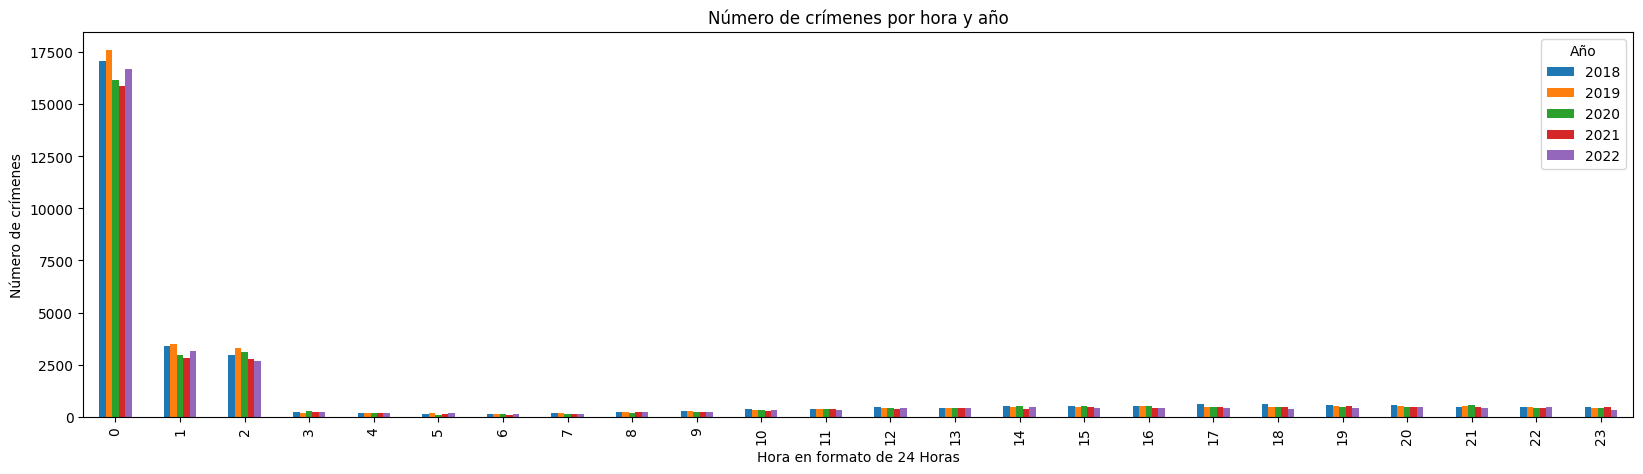

In [ ]:
# Agrupar los datos por "YEAR" y "MONTH" y contar el número de crímenes por mes
grouped_df = filtered_df.copy()
grouped_df['HOUR_FROM'] = pd.to_datetime(grouped_df['HOUR_FROM'], format='%H:%M:%S').dt.hour
grouped_df = grouped_df.groupby(['YEAR', 'HOUR_FROM'])['YEAR'].count()

# Reorganizar los datos en un DataFrame
crime_by_year_month = grouped_df.unstack(level=0)

# Crear un gráfico de líneas con cada año como serie
crime_by_year_month.plot(kind='bar', figsize=(20,5), linewidth=3)

# Personalizar el gráfico
plt.title('Número de crímenes por hora y año')
plt.xlabel('Hora en formato de 24 Horas')
plt.ylabel('Número de crímenes')
plt.legend(title='Año', loc='upper right')
plt.show()

## **Gráfico de Barras con la edad de la victima y segmentación entre hombre y mujer**

Ahora bien, al analizar al tiempo la edad de las victimas y su género, encontramos que la mayoría de víctimas son mujeres para los rangos de edades de los 18 hasta los 50 años. Mientras que desde los 51 años en adelante, las victimas son en su mayoría hombres.

<ipython-input-211-741713a438be>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victim_df['VICTIM_AGE'] = victim_df['VICTIM_AGE'].astype(cat_dtype)


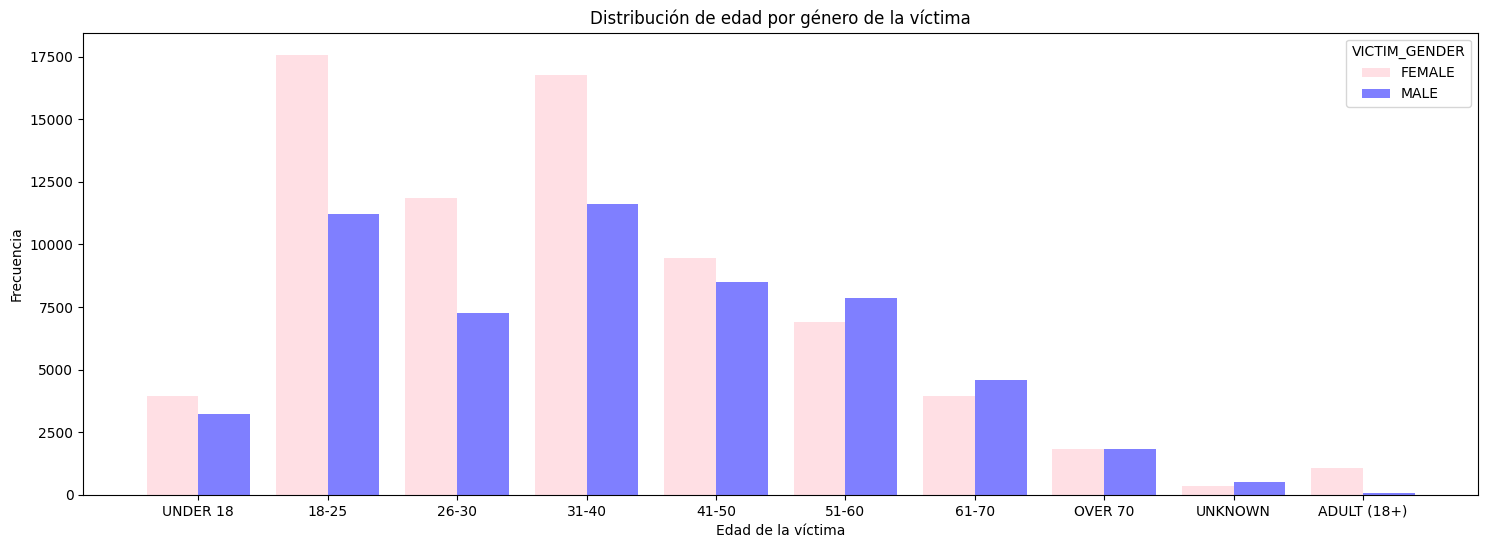

In [ ]:
# Definir el orden de las categorías de edad
orden_edad = ['UNDER 18', '18-25', '26-30', '31-40', '41-50', '51-60', '61-70', 'OVER 70', 'UNKNOWN', 'ADULT (18+)']

# Crear un tipo de datos categórico con el orden de edad
cat_dtype = pd.CategoricalDtype(categories=orden_edad, ordered=True)

# Filtrar solo las filas con datos de edad y género de la víctima
victim_df = filtered_df[['VICTIM_AGE', 'VICTIM_GENDER']]

# Convertir la columna 'VICTIM_AGE' en un tipo de datos categórico con el orden de edad
victim_df['VICTIM_AGE'] = victim_df['VICTIM_AGE'].astype(cat_dtype)

# Ordenar el DataFrame por la columna 'VICTIM_AGE' en base al orden de edad definido
victim_df = victim_df.sort_values(by='VICTIM_AGE')

# Separar los datos de edad por género de la víctima
female_heights = victim_df[victim_df['VICTIM_GENDER'] == 'FEMALE']['VICTIM_AGE'].value_counts(sort=False)
male_heights = victim_df[victim_df['VICTIM_GENDER'] == 'MALE']['VICTIM_AGE'].value_counts(sort=False)

# Crear un gráfico de barras para visualizar la distribución de edad por género de la víctima
fig, ax = plt.subplots(figsize=(18, 6))
bin_centers = np.arange(len(orden_edad))

ax.bar(bin_centers-0.2, female_heights, width=0.4, color='pink', alpha=0.5, label='FEMALE')
ax.bar(bin_centers+0.2, male_heights, width=0.4, color='blue', alpha=0.5, label='MALE')

# Agregar etiquetas de los ejes y un título
ax.set_xlabel('Edad de la víctima')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de edad por género de la víctima')
ax.legend(title='VICTIM_GENDER', loc='upper right')

# Alinear las etiquetas del eje x con las barras
ax.set_xticks(bin_centers)
ax.set_xticklabels(orden_edad)

plt.show()


# **6. Análisis de las Distribuciones de probabilidad de presentarse un crimen:**

El tipo de distribución de probabilidad que se utiliza para modelar la frecuencia de ocurrencia de un evento en un periodo de tiempo dado es la distribución de Poisson.

La distribución de Poisson describe el número de ocurrencias de un evento en un intervalo de tiempo específico, asumiendo que las ocurrencias son aleatorias e independientes y que la tasa promedio de ocurrencia es constante en todo el intervalo de tiempo.

Para calcular la probabilidad de que un evento ocurra en un día determinado "x", dado que se tiene la cantidad de veces que ocurre ese evento por día durante un año determinado. En este caso, durante el año 2022. Posteriormente, calculamos el mínimo y el máximo del número de crímenes por día que serían el *rango* de la distribución; y calculamos la media del número de crímenes que sería el parámetro *mu* y ajustamos estos datos en una distribución **Poisson** y posteriomente graficamos:

## **Análisis de todo Cincinnati**

In [ ]:
filtered2022 = filtered_df[filtered_df['YEAR'] == 2022].sort_values('DATE_FROM').reset_index() ##Sacamos únicamente los datos del año 2022

filtered2022['DATE_FROM'] = pd.to_datetime(filtered2022['DATE_FROM']).dt.date #Ajustamos la fecha para que no tenga en cuenta la hora en cada una de las fechas

most_common_day = filtered2022['DATE_FROM'].value_counts().sort_index() #Contamos la cantidad de crimenes por día

columnas = ["FECHA","CANTIDAD"] #Creamos una lista con columnas para hacer el nuevo data set

nuevo_df = pd.DataFrame(columns=columnas)
nuevo_df["FECHA"] = most_common_day.index
nuevo_df["CANTIDAD"] = most_common_day.values

min = nuevo_df["CANTIDAD"].min()
max = nuevo_df["CANTIDAD"].max()
prom = nuevo_df['CANTIDAD'].mean()

df_prob = pd.DataFrame(data={'Resultado':range(min,max), 'Probabilidad':poisson.pmf(k=range(min,max),mu=prom)})

df_prob

,Resultado,Probabilidad
0,28,4.800445e-12
1,29,1.346301e-11
2,30,3.649891e-11
3,31,9.575842e-11
4,32,2.433805e-10
...,...,...
122,150,2.884727e-12
123,151,1.553770e-12
124,152,8.313844e-13
125,153,4.419460e-13


En el análisis gráfico de esta distribución de probabilidad, observamos como se distribuye Poisson con una media de 80 crímenes por día (probabilidad del 4.4%), un mínimo de 28 crímenes por día y un máximo de 154 crímenes por día, cuyas probabilidades son cercanas al 0%.

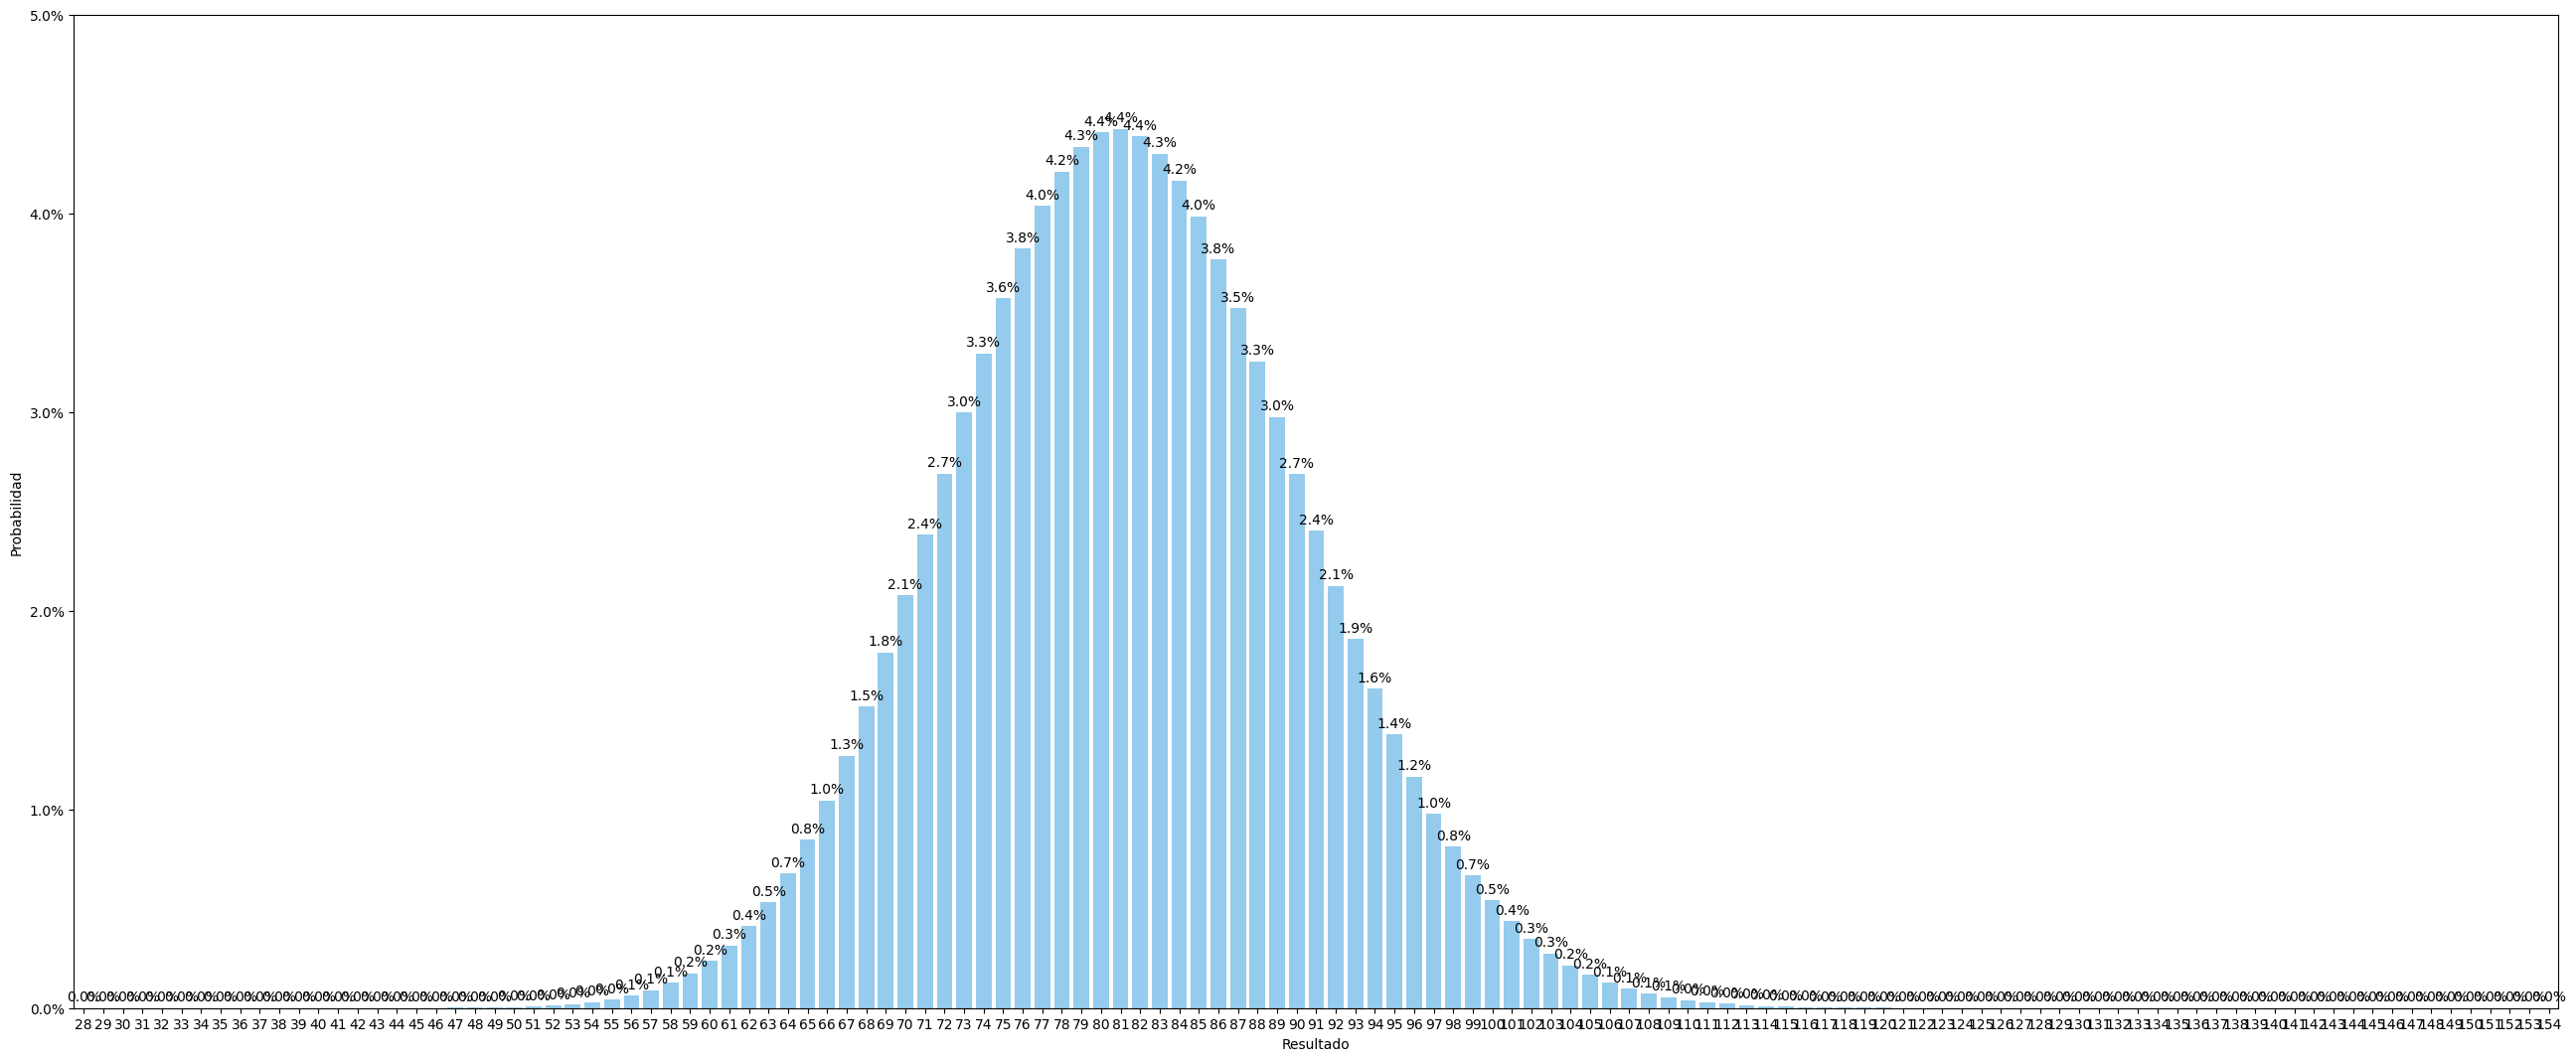

In [ ]:
fig_sns = plt.figure(figsize=(25, 10)) # establece el ancho de la figura en 10 pulgadas y altura en 6 pulgadas
ax = fig_sns.add_axes([0, 0, 1, 1])
ax = sns.barplot(x=df_prob["Resultado"], y=df_prob["Probabilidad"]*100, color="lightskyblue") 
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.1f%%', padding=3, size=10)  
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
ax.set(ylim=(0, 5))

plt.show()

## **Análisis por barrio**

Posteriormente, quisimos analizar cuál era la distribución de probabilidad no sólo en Cincinnati como ciudad, sino en cada uno de sus barrios, para determinar en qué barrio es más probable que ocurra un crimen en un día determinado y en dónde es menos probable dicho evento.

In [ ]:
# Paso 1: Cuenta cuantos registros se tiene por cada SNA_NEIGHBORHOOD y nombra esta columna como "NUM_CRIMENES"
num_crimenes = filtered2022.groupby('SNA_NEIGHBORHOOD').size().reset_index(name='NUM_CRIMENES')

# Paso 2: Cuenta cuantos días diferentes salen en todos los registros por cada SNA_NEIGHBORHOOD y nombra esta columna como "NUM_DIAS_UNICOS".
num_dias_unicos = filtered2022.groupby('SNA_NEIGHBORHOOD')['DATE_FROM'].nunique().reset_index(name='NUM_DIAS_UNICOS')

# Paso 3: Cuenta por cada DATE_FROM en cada SNA_NEIGHBORHOOD los crímenes y saca el valor mínimo por cada SNA_NEIGHBORHOOD y 
# nombra esta columna como "NUM_CRIM_MIN_POR_DIA" y se realiza lo mismo para pera el MAX.
num_crim_por_dia = filtered2022.groupby(['SNA_NEIGHBORHOOD', 'DATE_FROM']).size().reset_index(name='NUM_CRIMENES')
num_crim_min_por_dia = num_crim_por_dia.groupby('SNA_NEIGHBORHOOD')['NUM_CRIMENES'].min().reset_index(name='NUM_CRIM_MIN_POR_DIA')
num_crim_max_por_dia = num_crim_por_dia.groupby('SNA_NEIGHBORHOOD')['NUM_CRIMENES'].max().reset_index(name='NUM_CRIM_MAX_POR_DIA')

# Nueva tabla
tabla = pd.merge(num_crimenes, num_dias_unicos, on='SNA_NEIGHBORHOOD')
tabla = pd.merge(tabla, num_crim_min_por_dia, on='SNA_NEIGHBORHOOD')
tabla = pd.merge(tabla, num_crim_max_por_dia, on='SNA_NEIGHBORHOOD')
tabla['MU'] = tabla['NUM_CRIMENES'] / tabla['NUM_DIAS_UNICOS']
tabla['MU_ANIO'] = tabla['NUM_CRIMENES'] / 365
#tabla = tabla.sort_values(by='MU', ascending=False)
tabla = tabla.sort_values(by='MU_ANIO', ascending=False)
tabla

,SNA_NEIGHBORHOOD,NUM_CRIMENES,NUM_DIAS_UNICOS,NUM_CRIM_MIN_POR_DIA,NUM_CRIM_MAX_POR_DIA,MU,MU_ANIO
48,WESTWOOD,6183,365,4,46,16.939726,16.939726
12,EAST PRICE HILL,1740,342,1,42,5.087719,4.767123
0,AVONDALE,1564,344,1,18,4.546512,4.284932
33,OVER-THE-RHINE,1485,342,1,24,4.342105,4.068493
47,WEST PRICE HILL,1269,336,1,39,3.776786,3.476712
10,DOWNTOWN,1179,322,1,38,3.661491,3.230137
9,CUF,1018,305,1,24,3.337705,2.789041
46,WEST END,887,303,1,15,2.927393,2.430137
25,MT. AIRY,864,287,1,19,3.010453,2.367123
6,COLLEGE HILL,795,292,1,15,2.722603,2.178082


Luego de analizar la probabilidad de que suceda un crimen en cada barrio de la ciudad, encontramos que el barrio más "peligroso" es **Westwood** con una probabilidad del 10% que ocurra en promedio dieciseis crimenes en un día y el barrio mas "Seguro" es **California** en donde es muy poco probable que ocurra un crimen.

Tambien se debe tener en cuenta que el segundo barrio mas "peligroso" es **East Price West**, tiene una probabilidad del 17% que ocurra en promedio 5 crimenes, llama la atención que del primer barrio al segundo hay una diferencia de 12.2 crimenes en promedio, al ser menos crimenenes en el segundo la probabilidad de que ocurran es más alta.

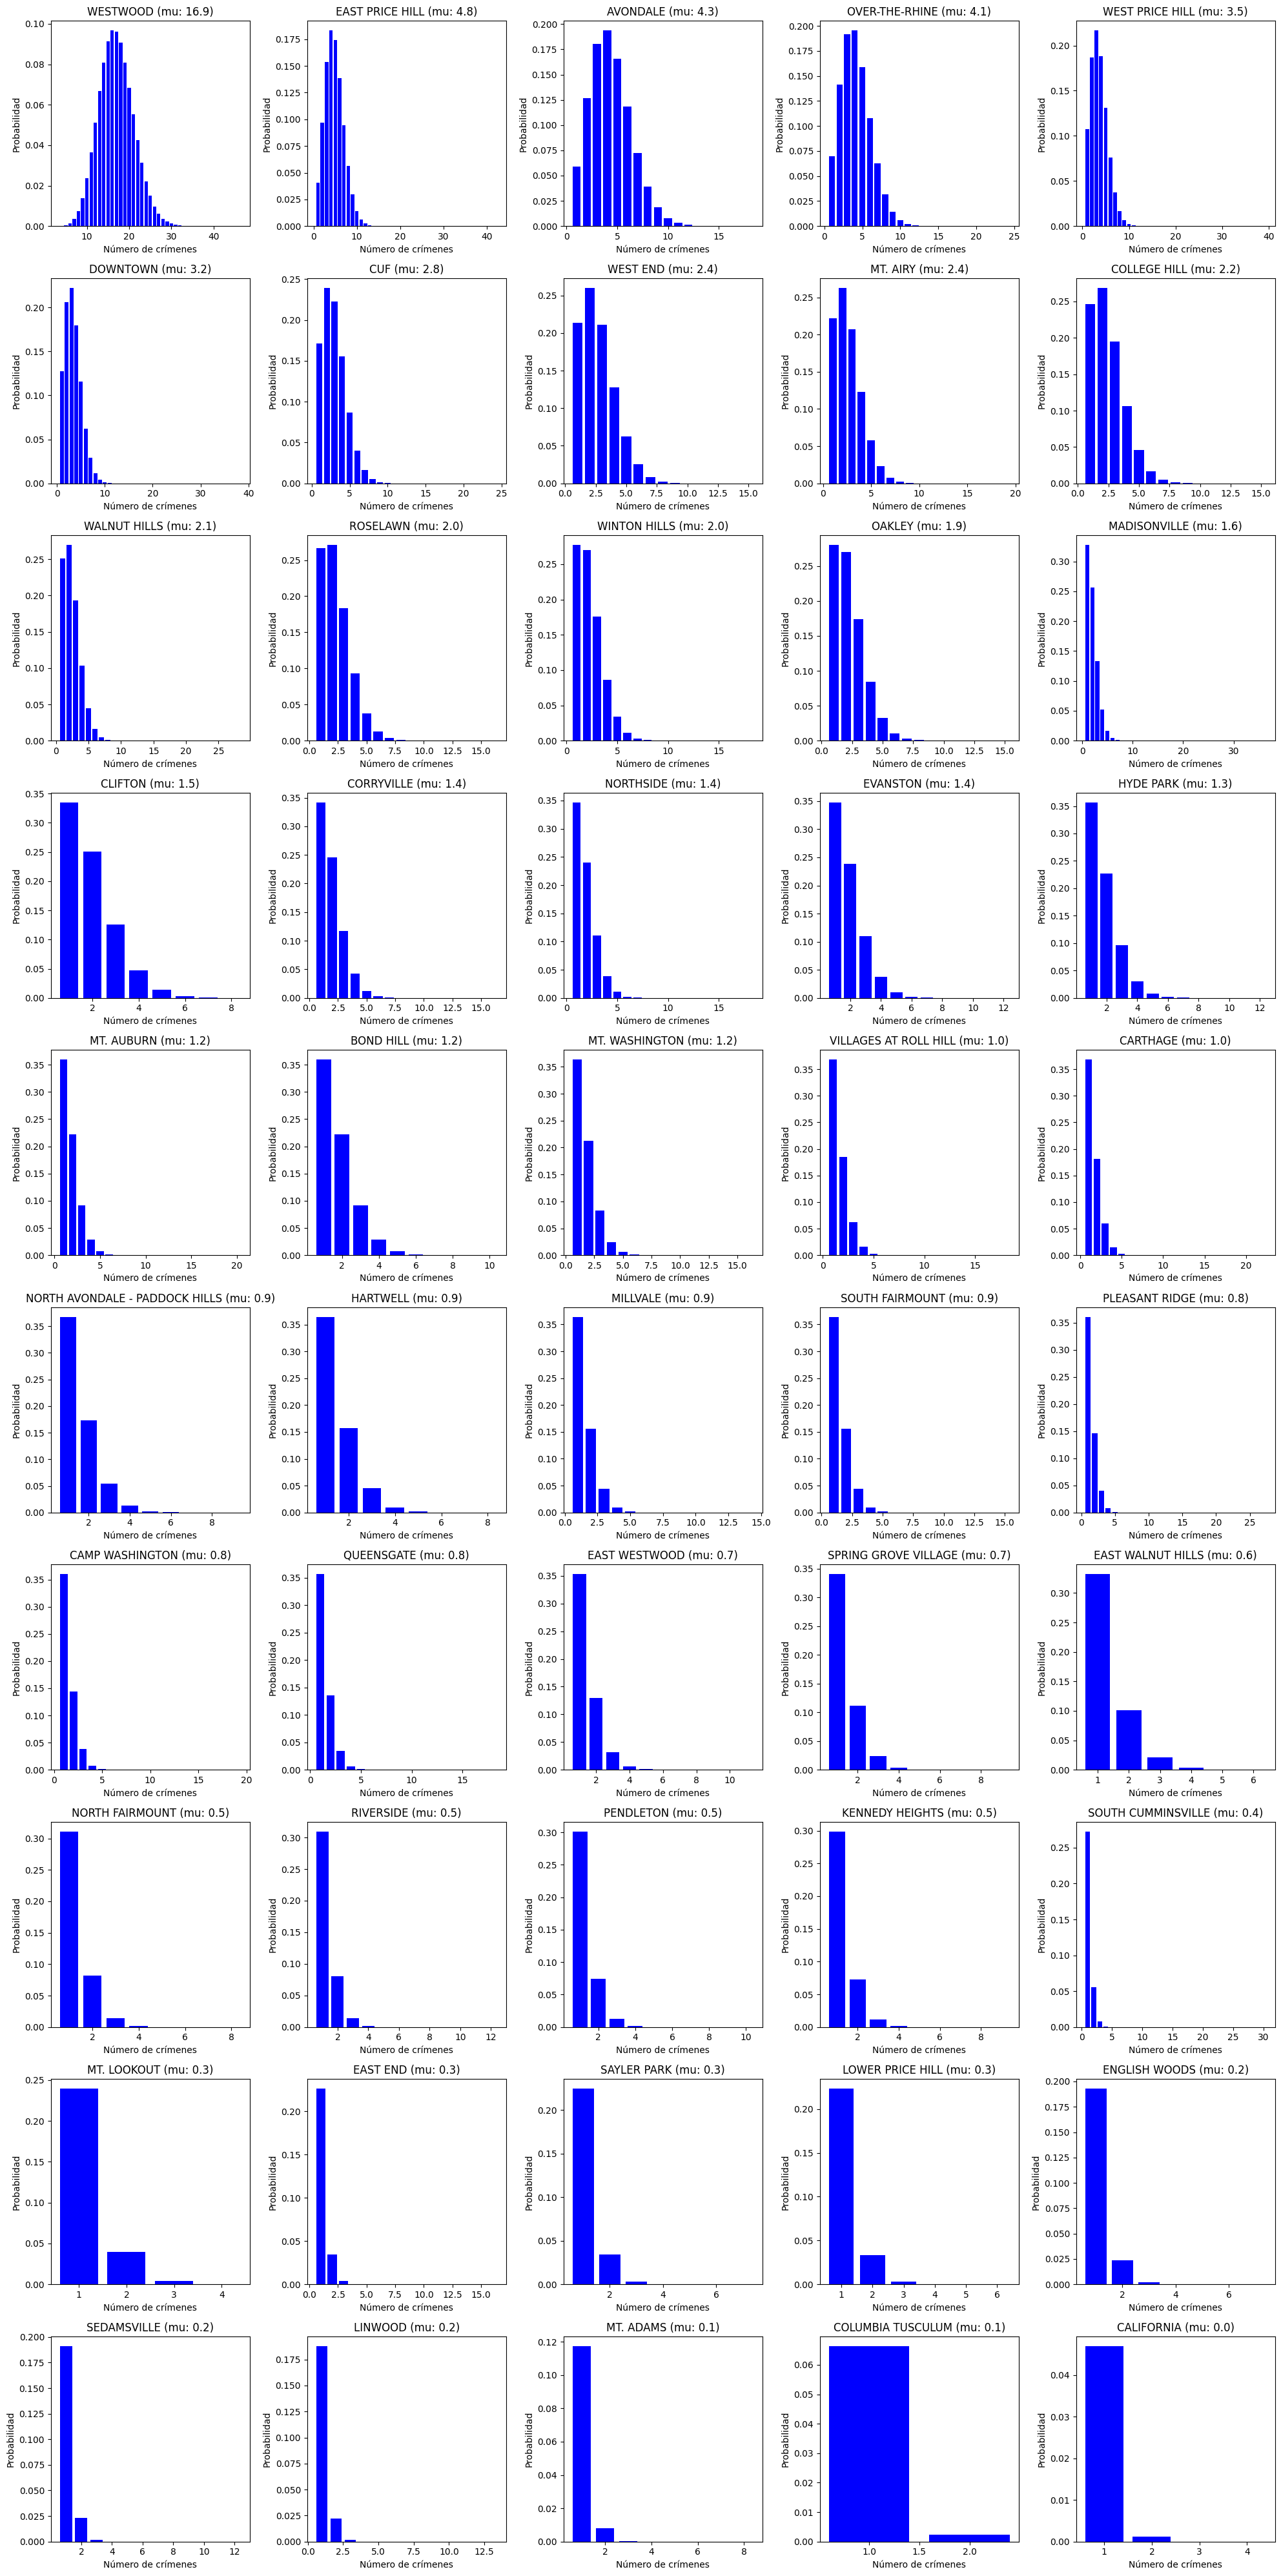

In [ ]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Recorremos cada vecindario en la tabla
fig, axs = plt.subplots(10, 5, figsize=(20, 40))
for i, neighborhood in enumerate(tabla['SNA_NEIGHBORHOOD']):
    # Obtenemos los valores de mu, el mínimo y el máximo para el vecindario actual
    #mu = tabla.loc[tabla['SNA_NEIGHBORHOOD'] == neighborhood, 'MU'].values[0]
    mu = tabla.loc[tabla['SNA_NEIGHBORHOOD'] == neighborhood, 'MU_ANIO'].values[0]
    mini = tabla.loc[tabla['SNA_NEIGHBORHOOD'] == neighborhood, 'NUM_CRIM_MIN_POR_DIA'].values[0]
    maxi = tabla.loc[tabla['SNA_NEIGHBORHOOD'] == neighborhood, 'NUM_CRIM_MAX_POR_DIA'].values[0]
    mu_round = round(mu,1)

    # Generamos un rango de valores para x
    x = np.arange(mini, maxi + 1)
    
    # Calculamos la probabilidad para cada valor de x utilizando la distribución de Poisson
    y = poisson.pmf(x, mu)
    
    # Graficamos la función de probabilidad
    col = i % 5
    row = i // 5
    axs[row, col].bar(x, y, color='b')
    axs[row, col].set_title(f"{neighborhood} (mu: {mu_round})")
    axs[row, col].set_xlabel("Número de crímenes")
    axs[row, col].set_ylabel("Probabilidad")
    
plt.tight_layout() # ajusta automaticamente el espacio entre gráficos
plt.show()

## **Graficos de geolocalización de crimenes por Barrios de Cincinnati**

Finalmente, como parte del análisis multivariado, tomamos los diferentes puntos de la ciudad donde ocurrieron los crímenes y su frecuencia para agregar este matiz a los puntos como si fuese un semáforo, donde el color rojo representa una mayor frecuencia que el color azul, de forma que tengamos una especie de mapa de calor de las zonas con más criminalidad de la ciudad de Cincinnati.

In [ ]:
import requests
import folium
from folium import plugins

# Crear un mapa centrado en Nueva York
ny_map = folium.Map(location=[39.14, -84.5], zoom_start=12, width=850, height=550)

# Obtener el número de crímenes por barrio
crime_counts = filtered_df.groupby('SNA_NEIGHBORHOOD')['SNA_NEIGHBORHOOD'].count()

# Agregar marcadores para cada barrio con el número de crímenes correspondiente
for neighborhood, count in crime_counts.items():
    # Obtener la latitud y longitud del barrio usando la API de geolocalización de OpenStreetMap
    geocode_url = f'https://nominatim.openstreetmap.org/search?q={neighborhood}, Cincinnati&format=json'
    
    try:
      response = requests.get(geocode_url).json()
      if len(response) > 0:
          lat = response[0]['lat']
          lon = response[0]['lon']
          # Crear un marcador con el número de crímenes como etiqueta
          label = f'{neighborhood}: {count} crímenes'
          if count >= 0 and count < 2000:
            folium.Marker(location=[float(lat), float(lon)], icon = folium.Icon(color = "lightblue"),tooltip=label).add_to(ny_map)
          
          elif count >= 2000 and count < 5000:
            folium.Marker(location=[float(lat), float(lon)], icon = folium.Icon(color = "orange"), tooltip=label).add_to(ny_map)

          elif count >= 5000 and count < 50000:
            folium.Marker(location=[float(lat), float(lon)], icon = folium.Icon(color = "red"), tooltip=label).add_to(ny_map)  
          
          else:
            folium.Marker(location=[float(lat), float(lon)], icon = folium.Icon(color = "green"), tooltip=label).add_to(ny_map)
    except:
        pass
# Mostrar el mapa
ny_map

# **7. Medidas para Data leakage (Opcional)**

El **Data Leakage** (referencia #13 en anexos) ocurre cuando los datos de entrenamiento de un modelo contienen información sobre el target, pero no habrá datos similares disponibles cuando el modelo se use para la predicción. Esto conduce a un alto rendimiento en el conjunto de entrenamiento, pero en la realidad el modelo tendrá un desempeño deficiente.

En otras palabras, el **Data Leakage** hace que un modelo parezca preciso hasta que se empieza a tomar decisiones con el modelo y luego el modelo se vuelve muy inexacto.

Hay dos tipos principales de **Data Leakage**: target leakage y train-test contamination.

1. *Target Leakage*: ocurre cuando los predictores incluyen datos que no estarán disponibles en el momento en que se realizan las predicciones. Es importante pensar en términos del momento o el orden cronológico en que los datos están disponibles, no simplemente si una característica ayuda a hacer buenas predicciones. En nuestro Dataset las variables **DATE_TO** y **HOUR_TO**, que son la fecha/hora estimada del final del crimen, serian variables que contaminarían un modelo, dado que no siempre estarán disponibles ni se podría calcular pues pertenecen al futuro en el caso de un crimen en curso (como un secuestro). **Para evitar este tipo de Data Leakage, se deben excluir estas variables de cualquier modelo de predicción.**

2. *train-test contamination*: Se produce cuando no se tiene cuidado al distinguir los datos de entrenamiento de los datos de validación. La validación pretende ser una medida de cómo funciona el modelo con datos que no ha considerado antes. Utilizar datos de entrenamiento para hacer la validación puede corromper este proceso de manera sutil, puesto que los datos de validación afectan el comportamiento de preprocesamiento. **Para evitar este tipo de Data Leakage, se deben excluir los datos de entrenamiento al hacer la validación del modelo de predicción.**

# **8. Deseable pero no obligatorio: Custom transformers y Pipelines.**

En este ejemplo, la clase EDA tiene un constructor que recibe como parámetro un conjunto de datos (data). La clase también tiene varios métodos para realizar diferentes análisis exploratorios de datos, como estadísticas descriptivas, valores nulos, valores únicos de una columna, matriz de correlación y gráficos de histograma, diagrama de caja y gráfico de dispersión.

In [ ]:
class EDA:
    def __init__(self, data):
        self.data = data
        
    def describe(self):
        # Estadísticas descriptivas
        print("Estadísticas descriptivas:")
        print(self.data.describe())
        
    def null_values(self):
        # Valores nulos
        print("Valores nulos:")
        print(self.data.isnull().sum())
        
    def unique_values(self, column):
        # Valores únicos de una columna
        print("Valores únicos de la columna " + column + ":")
        print(self.data[column].unique())
        
    def correlation_matrix(self):
        # Matriz de correlación
        print("Matriz de correlación:")
        print(self.data.corr())
        
    def plot_histogram(self, column):
        # Histograma de una columna
        self.data[column].hist()
        
    def plot_boxplot(self, column):
        # Diagrama de caja de una columna
        self.data.boxplot(column=column)
        
    def plot_scatter(self, x, y):
        # Gráfico de dispersión entre dos variables
        self.data.plot.scatter(x=x, y=y)

Para utilizar la clase EDA, primero se debe crear una instancia de la clase y pasarle como parámetro el conjunto de datos que se desea analizar. Luego, se puede llamar a cualquiera de los métodos de la clase para realizar el análisis deseado:

In [ ]:
datos = filtered_df
eda = EDA(datos)

Por ejemplo, al realizar un análisis exploratorio de datos utilizando la clase EDA, se imprimirán estadísticas descriptivas, valores nulos, valores únicos de la columna seleccionada, matriz de correlación, histograma de la columna seleccionada, diagrama de caja de la columna seleccionada y gráfico de dispersión entre las variables seleccionadas:

In [ ]:
#Estadísticas descriptivas de los datos
eda.describe()

Estadísticas descriptivas:
       TOTALNUMBERVICTIMS  TOTALSUSPECTS           YEAR          MONTH  \
count       152736.000000  152736.000000  152736.000000  152736.000000   
mean             1.547716       1.308545    2019.949377       6.642547   
std              3.906373       0.916794       1.417978       3.315961   
min              1.000000       1.000000    2018.000000       1.000000   
25%              1.000000       1.000000    2019.000000       4.000000   
50%              1.000000       1.000000    2020.000000       7.000000   
75%              1.000000       1.000000    2021.000000       9.000000   
max            126.000000      24.000000    2022.000000      12.000000   

            ANS_DAYS  
count  152736.000000  
mean       45.015517  
std       111.437244  
min         0.000000  
25%         1.000000  
50%        11.000000  
75%        36.000000  
max       824.942679  


In [ ]:
#conteo de valores nulos de los datos
eda.null_values()

Valores nulos:
DATE_REPORTED         0
DATE_FROM             0
DATE_TO               0
CLSD                  0
DST                   0
LOCATION              0
HATE_BIAS             0
WEAPONS               0
DATE_OF_CLEARANCE     0
HOUR_FROM             0
VICTIM_AGE            0
VICTIM_RACE           0
VICTIM_ETHNICITY      0
VICTIM_GENDER         0
SUSPECT_AGE           0
SUSPECT_RACE          0
SUSPECT_ETHNICITY     0
SUSPECT_GENDER        0
TOTALNUMBERVICTIMS    0
TOTALSUSPECTS         0
UCR_GROUP             0
SNA_NEIGHBORHOOD      0
DAY                   0
YEAR                  0
MONTH                 0
ANS_DAYS              0
dtype: int64


In [ ]:
#Valores únicos de la columna armas:
eda.unique_values("WEAPONS")

Valores únicos de la columna WEAPONS:
['99 - NONE' '80 - OTHER WEAPON' 'U - UNKNOWN'
 '40 - PERSONAL WEAPONS (HANDS, FEET, TEETH, ETC.)' '12 - HANDGUN'
 '11 - FIREARM (TYPE NOT STATED)'
 '20 - KNIFE/CUTTING INSTRUMENT (ICEPICK, AX, ETC.)'
 '18 - BB AND PELLET GUNS' '30 - BLUNT OBJECT (CLUB, HAMMER, ETC.)'
 '15B - SEMI-AUTOMATIC ASSAULT FIREARM'
 '35 - MOTOR VEHICLE (WHEN USED AS WEAPON)' '12A - AUTOMATIC HANDGUN'
 '13A - FULLY AUTOMATIC RIFLE' '15 - OTHER FIREARM' '14 - SHOTGUN'
 '85 - ASPHYXIATION (BY DROWNING, STRANGULATION, SUFFOCATION)'
 '16 - IMITATION FIREARM' '17 - SIMULATED FIREARM' '13 - RIFLE'
 '70 - DRUGS/NARCOTICS/SLEEPING PILLS' '65 - FIRE/INCENDIARY DEVICE'
 '50 - POISON' '60 - EXPLOSIVES'
 '13B - OTHER FULLY AUTOMATIC FIREARM (TYPE NOT STATED)'
 '15A - SEMI-AUTOMATIC SPORTING RIFLE']


In [ ]:
#Matriz de correlación entre las variables numéricas
eda.correlation_matrix()

Matriz de correlación:
                    TOTALNUMBERVICTIMS  TOTALSUSPECTS      YEAR     MONTH  \
TOTALNUMBERVICTIMS            1.000000       0.020026 -0.008404 -0.027637   
TOTALSUSPECTS                 0.020026       1.000000  0.004793  0.024314   
YEAR                         -0.008404       0.004793  1.000000  0.004224   
MONTH                        -0.027637       0.024314  0.004224  1.000000   
ANS_DAYS                     -0.012022       0.052842 -0.057041 -0.025996   

                    ANS_DAYS  
TOTALNUMBERVICTIMS -0.012022  
TOTALSUSPECTS       0.052842  
YEAR               -0.057041  
MONTH              -0.025996  
ANS_DAYS            1.000000  


<ipython-input-221-ca7cb1cba8ce>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(self.data.corr())


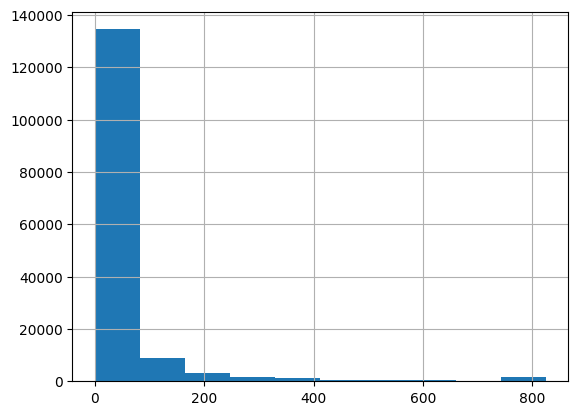

In [ ]:
# Histrograma de la variable Año
eda.plot_histogram("ANS_DAYS")

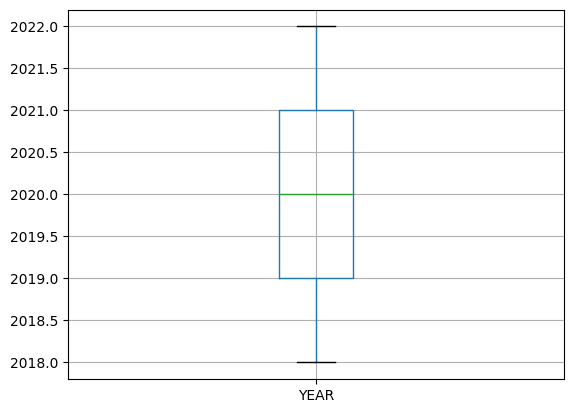

In [ ]:
#Box plot de la variable Año
eda.plot_boxplot("YEAR")

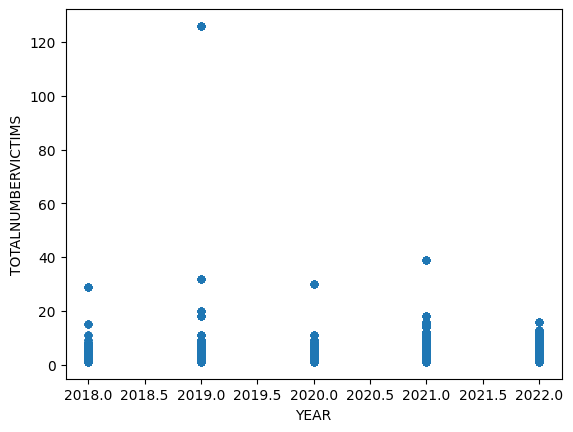

In [ ]:
#Gráfico de dispersión entre las variables año y número total de víctimas:
eda.plot_scatter("YEAR", "TOTALNUMBERVICTIMS")

# **9. Enlaces de referencia:**

**Referencias casos de Crímenes**

(1) https://www.icesi.edu.co/moodle/pluginfile.php?file=%2F986478%2Fmod_resource%2Fcontent%2F1%2FExample_report_EDA.pdf

(2) https://rstudio-pubs-static.s3.amazonaws.com/487117_8ec42389ebac4d2ba0f62553510f2f3a.html

**Archivos Clase EDA**

(3) https://github.com/armandoordonez/eda_couse/blob/main/3_data_preparation_cleaning.ipynb

(4) https://github.com/armandoordonez/eda_couse/blob/main/One_hot_encodign.ipynb

(5) https://github.com/armandoordonez/eda_couse/blob/main/Label_encoding.ipynb

(6) https://github.com/armandoordonez/eda_couse/blob/main/Taller_1_vino.ipynb

(7) https://github.com/armandoordonez/eda_couse/blob/main/outliers.ipynb

(8) https://github.com/armandoordonez/eda_couse/blob/main/Histogram%20and%20Density%20Plot.ipynb

(9) https://github.com/armandoordonez/eda_couse/blob/main/Transformations.ipynb

(10) https://github.com/armandoordonez/eda_couse/blob/main/Basic_Pipeline_custom.ipynb

https://github.com/armandoordonez/eda_couse/blob/main/Custom_transformers.ipynb

**Otros enlaces de referencia**

(11) https://python-charts.com/es/espacial/mapas-interactivos-folium/

(12) https://en.wikipedia.org/wiki/List_of_Cincinnati_neighborhoods

(13) https://www.kaggle.com/code/alexisbcook/data-leakage 
